# Data Science Project

Team Members:
Ignacio, Timothy, Jamie, Megan

...




# Data Exploration and Cleaning

In [ ]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

## Dataset A (Crypto Usage)

#####**download data to data frame**

In [ ]:
# Download dataset
df_crypto = pd.read_csv('/content/UK student crypto usage.csv')
df_crypto

Unnamed: 0 Channel  Surevy year      Degree Degree year Nationality  \
0               0  online         2022    Business         2nd      Turkey   
1               1     f2f         2020        STEM         MSc      Europe   
2               2  online         2024  Humanities         Phd       India   
3               3  online         2021        STEM         2nd      Europe   
4               4  online         2021        STEM         MSc         USA   
...           ...     ...          ...         ...         ...         ...   
15805       15805     f2f         2020  Humanities         PhD      Turkey   
15806       15806  online         2024    Business         1st      Africa   
15807       15807  online         2020    Business         MSc      Turkey   
15808       15808  online         2021        STEM         MSc       China   
15809       15809     f2f         2024    Business         MSc         USA   

      Career (Aspiration or current)  Crypto type    Crypto usage purpose  \
0                            Medical          BTC              remittance   
1                        Engineering  BTC,ETH,ALT                   trade   
2                            Medical      BTC,ALT        remittance,trans   
3                            Finance         DOGE                   trade   
4                         Technology          NFT  trade,remittance,trans   
...                              ...          ...                     ...   
15805                         Retail          ALT        remittance,trans   
15806                            NaN      ETH,ALT                   trade   
15807                        Medical      BTC,NFT                   trade   
15808                    Engineering          ETH                   trade   
15809                         Retail      BTC,ETH  trade,remittance,trans   

      Crypto knowledge Crypto usage duration (years) Trade performance  \
0                  +++                           4-5               NaN   
1                  +++                             1               NaN   
2                  +++                           4-5               NaN   
3                  +++                             1                --   
4                  NaN                           4-5                ++   
...                ...                           ...               ...   
15805               ++                           NaN               NaN   
15806                +                           1-3               NaN   
15807                +                             1                --   
15808               ++                           1-3                ++   
15809              +++                           NaN               NaN   

       Remittance amount (%) Crypto knowledge source  \
0                      100.0                  family   
1                        NaN          study/research   
2                       25.0          study/research   
3                        NaN                 friends   
4                       25.0                  family   
...                      ...                     ...   
15805                   50.0          study/research   
15806                    NaN                 friends   
15807                    NaN          study/research   
15808                    NaN          study/research   
15809                   25.0                  family   

      Influenced family and friends Intend to use crypto in future  
0                                 Y                              Y  
1                                 N                              Y  
2                                 N                              Y  
3                                 Y                              Y  
4                                 N                              Y  
...                             ...                            ...  
15805                             Y                              N  
15806                          

#####**Drop unnamed column (repeated row #)**

In [ ]:
df_crypto = df_crypto.drop(columns=['Unnamed: 0'])
df_crypto

Channel  Surevy year      Degree Degree year Nationality  \
0      online         2022    Business         2nd      Turkey   
1         f2f         2020        STEM         MSc      Europe   
2      online         2024  Humanities         Phd       India   
3      online         2021        STEM         2nd      Europe   
4      online         2021        STEM         MSc         USA   
...       ...          ...         ...         ...         ...   
15805     f2f         2020  Humanities         PhD      Turkey   
15806  online         2024    Business         1st      Africa   
15807  online         2020    Business         MSc      Turkey   
15808  online         2021        STEM         MSc       China   
15809     f2f         2024    Business         MSc         USA   

      Career (Aspiration or current)  Crypto type    Crypto usage purpose  \
0                            Medical          BTC              remittance   
1                        Engineering  BTC,ETH,ALT                   trade   
2                            Medical      BTC,ALT        remittance,trans   
3                            Finance         DOGE                   trade   
4                         Technology          NFT  trade,remittance,trans   
...                              ...          ...                     ...   
15805                         Retail          ALT        remittance,trans   
15806                            NaN      ETH,ALT                   trade   
15807                        Medical      BTC,NFT                   trade   
15808                    Engineering          ETH                   trade   
15809                         Retail      BTC,ETH  trade,remittance,trans   

      Crypto knowledge Crypto usage duration (years) Trade performance  \
0                  +++                           4-5               NaN   
1                  +++                             1               NaN   
2                  +++                           4-5               NaN   
3                  +++                             1                --   
4                  NaN                           4-5                ++   
...                ...                           ...               ...   
15805               ++                           NaN               NaN   
15806                +                           1-3               NaN   
15807                +                             1                --   
15808               ++                           1-3                ++   
15809              +++                           NaN               NaN   

       Remittance amount (%) Crypto knowledge source  \
0                      100.0                  family   
1                        NaN          study/research   
2                       25.0          study/research   
3                        NaN                 friends   
4                       25.0                  family   
...                      ...                     ...   
15805                   50.0          study/research   
15806                    NaN                 friends   
15807                    NaN          study/research   
15808                    NaN          study/research   
15809                   25.0                  family   

      Influenced family and friends Intend to use crypto in future  
0                                 Y                              Y  
1                                 N                              Y  
2                                 N                              Y  
3                                 Y                              Y  
4                                 N                              Y  
...                             ...                            ...  
15805                             Y                              N  
15806                             N                              Y  
15807                             Y                              N  
15808                             Y 

#####**Examine duplicates** - keep because they are likely different people with same data

In [ ]:
duplicates = df_crypto[df_crypto.duplicated(keep=False)]
print(duplicates)

      Channel  Surevy year      Degree Degree year    Nationality  \
1264   online         2020        STEM         3rd         Africa   
1948   online         2021        STEM         MSc          India   
3350   online         2020        STEM         3rd         Africa   
3486   online         2022        STEM         MSc             ME   
4373      f2f         2021        STEM         MSc             ME   
4926   online         2021        STEM         MSc          India   
5626      f2f         2020        STEM         2nd         Europe   
5955   online         2022        STEM         MSc          China   
6640   online         2021        STEM         MSc         Turkey   
7829   online         2021        STEM         MSc         Africa   
8146   online         2021        STEM         MSc         Turkey   
8401   online         2022        STEM         MSc          China   
8755      f2f         2021        STEM         MSc             ME   
9245   online         2020  Humani

#####**check for outliers**

In [ ]:
# Get unique values for each column to find possible outliers
for name in df_crypto.columns:
  unique_values = df_crypto[name].unique()
  print(unique_values)

['online' 'f2f']
[2022 2020 2024 2021 2023]
['Business' 'STEM' 'Humanities']
['2nd' 'MSc' 'Phd' 'PhD' '3rd' '1st']
['Turkey' 'Europe' 'India' 'USA' 'Africa' 'ME' 'China' 'South America'
 'UK']
['Medical' 'Engineering' 'Finance' 'Technology' nan 'Public' 'Retail'
 'Legal']
['BTC' 'BTC,ETH,ALT' 'BTC,ALT' 'DOGE' 'NFT' 'ALT' 'BTC,ETH' 'BTC,NFT,DOGE'
 'ETH,ALT' 'NFT,ALT' nan 'BTC,ETH,NFT' 'BTC,NFT' 'ETH' 'BTC,NFT,ALT'
 'BTC,DOGE' 'ETH,NFT,ALT' 'ETH,DOGE']
['remittance' 'trade' 'remittance,trans' 'trade,remittance,trans'
 'trade,remittance']
['+++' nan '+' '++']
['4-5' '1' '1-3' '5+' '11' nan '11-3' '1-31-3']
[nan '--' '++' '+++' '-' '+']
[100.  nan  25.  50.  75.]
['family' 'study/research' 'friends' 'marketing']
['Y' 'N']
['Y' 'N']


#####**Resolve Column Names** - Fix typos, convert to lowercase, use snake case, reduce redundancies

In [ ]:
# Lowercase and remove whitespace from column names
df_crypto.columns = [col.lower().replace(' ', '_') for col in df_crypto.columns]
df_crypto

channel  surevy_year      degree degree_year nationality  \
0      online         2022    Business         2nd      Turkey   
1         f2f         2020        STEM         MSc      Europe   
2      online         2024  Humanities         Phd       India   
3      online         2021        STEM         2nd      Europe   
4      online         2021        STEM         MSc         USA   
...       ...          ...         ...         ...         ...   
15805     f2f         2020  Humanities         PhD      Turkey   
15806  online         2024    Business         1st      Africa   
15807  online         2020    Business         MSc      Turkey   
15808  online         2021        STEM         MSc       China   
15809     f2f         2024    Business         MSc         USA   

      career_(aspiration_or_current)  crypto_type    crypto_usage_purpose  \
0                            Medical          BTC              remittance   
1                        Engineering  BTC,ETH,ALT                   trade   
2                            Medical      BTC,ALT        remittance,trans   
3                            Finance         DOGE                   trade   
4                         Technology          NFT  trade,remittance,trans   
...                              ...          ...                     ...   
15805                         Retail          ALT        remittance,trans   
15806                            NaN      ETH,ALT                   trade   
15807                        Medical      BTC,NFT                   trade   
15808                    Engineering          ETH                   trade   
15809                         Retail      BTC,ETH  trade,remittance,trans   

      crypto_knowledge crypto_usage_duration_(years) trade_performance  \
0                  +++                           4-5               NaN   
1                  +++                             1               NaN   
2                  +++                           4-5               NaN   
3                  +++                             1                --   
4                  NaN                           4-5                ++   
...                ...                           ...               ...   
15805               ++                           NaN               NaN   
15806                +                           1-3               NaN   
15807                +                             1                --   
15808               ++                           1-3                ++   
15809              +++                           NaN               NaN   

       remittance_amount_(%) crypto_knowledge_source  \
0                      100.0                  family   
1                        NaN          study/research   
2                       25.0          study/research   
3                        NaN                 friends   
4                       25.0                  family   
...                      ...                     ...   
15805                   50.0          study/research   
15806                    NaN                 friends   
15807                    NaN          study/research   
15808                    NaN          study/research   
15809                   25.0                  family   

      influenced_family_and_friends intend_to_use_crypto_in_future  
0                                 Y                              Y  
1                                 N                              Y  
2                                 N                              Y  
3                                 Y                              Y  
4                                 N                              Y  
...                             ...                            ...  
15805                             Y                              N  
15806                             N                              Y  
15807                             Y                              N  
15808                             Y 

In [ ]:
df_crypto.rename(columns={
    'surevy_year': 'survey_year',
    'career_(aspiration_or_current)': 'career',
    'crypto_usage_purpose': 'usage_purpose',
    'crypto_usage_duration_(years)': 'usage_duration_years',
    'remittance_amount_(%)': 'remittance_percentage',
    'crypto_knowledge': 'knowledge_level',
    'crypto_knowledge_source': 'knowledge_source',
    'intend_to_use_crypto_in_future': 'intends_future_use'
}, inplace=True)
df_crypto.columns

Index(['channel', 'survey_year', 'degree', 'degree_year', 'nationality',
       'career', 'crypto_type', 'usage_purpose', 'knowledge_level',
       'usage_duration_years', 'trade_performance', 'remittance_percentage',
       'knowledge_source', 'influenced_family_and_friends',
       'intends_future_use'],
      dtype='object')

#####**Standardize Values** - Resolve inconsistencies, fix formatting, dummify if needed, etc.

In [ ]:
# Get unique values for each column to find inconsitencies
for name in df_crypto.columns:
  unique_values = df_crypto[name].unique()
  print(unique_values)

['online' 'f2f']
[2022 2020 2024 2021 2023]
['Business' 'STEM' 'Humanities']
['2nd' 'MSc' 'Phd' 'PhD' '3rd' '1st']
['Turkey' 'Europe' 'India' 'USA' 'Africa' 'ME' 'China' 'South America'
 'UK']
['Medical' 'Engineering' 'Finance' 'Technology' nan 'Public' 'Retail'
 'Legal']
['BTC' 'BTC,ETH,ALT' 'BTC,ALT' 'DOGE' 'NFT' 'ALT' 'BTC,ETH' 'BTC,NFT,DOGE'
 'ETH,ALT' 'NFT,ALT' nan 'BTC,ETH,NFT' 'BTC,NFT' 'ETH' 'BTC,NFT,ALT'
 'BTC,DOGE' 'ETH,NFT,ALT' 'ETH,DOGE']
['remittance' 'trade' 'remittance,trans' 'trade,remittance,trans'
 'trade,remittance']
['+++' nan '+' '++']
['4-5' '1' '1-3' '5+' '11' nan '11-3' '1-31-3']
[nan '--' '++' '+++' '-' '+']
[100.  nan  25.  50.  75.]
['family' 'study/research' 'friends' 'marketing']
['Y' 'N']
['Y' 'N']


In [ ]:
# Look at nationality values, we have regions and countries
nationality_counts = df_crypto['nationality'].value_counts()
nationality_counts

nationality
Turkey           2679
USA              2321
China            2138
ME               1792
South America    1769
Europe           1752
Africa           1615
India            1274
UK                470
Name: count, dtype: int64

In [ ]:
# Map countries to a region
regions = {
    'Turkey': 'ME',
    'USA': 'NA',
    'China': 'AS',
    'India': 'AS',
    'South America': 'SA',
    'Europe': 'EU',
    'Africa': 'AF',
    'UK': 'EU',
    'ME': 'ME'
}

# Replace countries with regions
df_crypto['region'] = df_crypto['nationality'].replace(regions)
df_crypto['region'].value_counts()

region
ME    4471
AS    3412
NA    2321
EU    2222
SA    1769
AF    1615
Name: count, dtype: int64

In [ ]:
# Change f2f to read face-to-face for clarity
df_crypto['channel'] = df_crypto['channel'].map(lambda x: 'face_to_face' if x == 'f2f' else x)

In [ ]:
# Change Y and N values to True or False
df_crypto['influenced_family_and_friends'] = df_crypto['influenced_family_and_friends'].map({'Y': True, 'N': False})
df_crypto['intends_future_use'] = df_crypto['intends_future_use'].map({'Y': True, 'N': False})

In [ ]:
# Change "Phd" to "PhD" in the 'degree_year' column
df_crypto['degree_year'] = df_crypto['degree_year'].str.replace('Phd', 'PhD')

In [ ]:
# Change values to lowercase
df_crypto['career'] = df_crypto['career'].str.lower()
df_crypto['degree'] = df_crypto['degree'].str.lower()
#df_crypto['degree'] = df_crypto['degree'].str.replace('stem', 'STEM')

In [ ]:
# Convert + and - to numerical value
def convert_level(level):
    """Converts '+' symbols to positive and '-' to negative integers."""
    if level == '+':
        return 1
    elif level == '++':
        return 2
    elif level == '+++':
        return 3
    elif level == '-':
        return -1
    elif level == '--':
        return -2
    elif level == '---':
        return -3
    else:
        return level

df_crypto['knowledge_level'] = df_crypto['knowledge_level'].apply(convert_level)
df_crypto['trade_performance'] = df_crypto['trade_performance'].apply(convert_level)

In [ ]:
# Fix order of columns to be more cohesive
# Order: demographic/education and career -> crypto knowledge -> crypto usage -> influence and performance
df_crypto = df_crypto[['survey_year', 'region', 'degree', 'degree_year', 'career', 'channel', 'knowledge_level', 'knowledge_source', 'crypto_type', 'usage_purpose', 'usage_duration_years', 'influenced_family_and_friends', 'remittance_percentage', 'trade_performance', 'intends_future_use']]
df_crypto

survey_year region      degree degree_year       career       channel  \
0             2022     ME    business         2nd      medical        online   
1             2020     EU        stem         MSc  engineering  face_to_face   
2             2024     AS  humanities         PhD      medical        online   
3             2021     EU        stem         2nd      finance        online   
4             2021     NA        stem         MSc   technology        online   
...            ...    ...         ...         ...          ...           ...   
15805         2020     ME  humanities         PhD       retail  face_to_face   
15806         2024     AF    business         1st          NaN        online   
15807         2020     ME    business         MSc      medical        online   
15808         2021     AS        stem         MSc  engineering        online   
15809         2024     NA    business         MSc       retail  face_to_face   

       knowledge_level knowledge_source  crypto_type           usage_purpose  \
0                  3.0           family          BTC              remittance   
1                  3.0   study/research  BTC,ETH,ALT                   trade   
2                  3.0   study/research      BTC,ALT        remittance,trans   
3                  3.0          friends         DOGE                   trade   
4                  NaN           family          NFT  trade,remittance,trans   
...                ...              ...          ...                     ...   
15805              2.0   study/research          ALT        remittance,trans   
15806              1.0          friends      ETH,ALT                   trade   
15807              1.0   study/research      BTC,NFT                   trade   
15808              2.0   study/research          ETH                   trade   
15809              3.0           family      BTC,ETH  trade,remittance,trans   

      usage_duration_years  influenced_family_and_friends  \
0                      4-5                           True   
1                        1                          False   
2                      4-5                          False   
3                        1                           True   
4                      4-5                          False   
...                    ...                            ...   
15805                  NaN                           True   
15806                  1-3                          False   
15807                    1                           True   
15808                  1-3                           True   
15809                  NaN                           True   

       remittance_percentage  trade_performance  intends_future_use  
0                      100.0                NaN                True  
1                        NaN                NaN                True  
2                       25.0                NaN                True  
3                        NaN               -2.0                True  
4                       25.0                2.0                True  
...                      ...                ...                 ...  
15805                   50.0                NaN               False  
15806                    NaN                NaN                True  
15807                    NaN               -2.0               False  
15808                    NaN                2.0                True  
15809                   25.0                NaN                True  

[15810 rows x 15 columns]

In [ ]:
# Look at values for usage duration years
# There are consistent typos where I believe from this context we can assume the following:
# Because the values appear to be 1, 1-3, 4-5, and then 5+ years...
# 11 is too specific of a larger number and it is a typo for 1, so we can fix these
# Furthermore, 11-3 means 1-3, the same typo as before and a range of 11 to 3 does not make sense numerically
# Finally, 1-31-3 is simply 1-3 repeated twice and again does not make sense as a range meaning it is a typo for 1-3
usage_duration_counts = df_crypto['usage_duration_years'].value_counts()
usage_duration_counts

usage_duration_years
1         4905
1-3       4109
4-5       2880
5+        1390
11         421
11-3       324
1-31-3     152
Name: count, dtype: int64

In [ ]:
# Fix usage ranges as explained in previous block
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('11', '1')
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('11-3', '1-3')
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('1-31-3', '1-3')
# Convert ranges to a midpoint value to approximate years
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('1-3', '2')
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('4-5', '4.5')
df_crypto.loc[:, 'usage_duration_years'] = df_crypto['usage_duration_years'].str.replace('5+', '5')
# Convert to numbers
df_crypto['usage_duration_years'] = pd.to_numeric(df_crypto['usage_duration_years'])

usage_duration_counts = df_crypto['usage_duration_years'].unique()
usage_duration_counts

<ipython-input-1487-b21b25a8debe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crypto['usage_duration_years'] = pd.to_numeric(df_crypto['usage_duration_years'])


array([4.5, 1. , 2. , 5. , nan])

In [ ]:
# Replace 'trans' with 'transactions' in the usage_purpose column for clarity
df_crypto.loc[:, 'usage_purpose'] = df_crypto['usage_purpose'].str.replace('trans', 'transactions')

In [ ]:
# Get unique values for each column again to check if everything was resolved
for name in df_crypto.columns:
  unique_values = df_crypto[name].unique()
  print(unique_values)

[2022 2020 2024 2021 2023]
['ME' 'EU' 'AS' 'NA' 'AF' 'SA']
['business' 'stem' 'humanities']
['2nd' 'MSc' 'PhD' '3rd' '1st']
['medical' 'engineering' 'finance' 'technology' nan 'public' 'retail'
 'legal']
['online' 'face_to_face']
[ 3. nan  1.  2.]
['family' 'study/research' 'friends' 'marketing']
['BTC' 'BTC,ETH,ALT' 'BTC,ALT' 'DOGE' 'NFT' 'ALT' 'BTC,ETH' 'BTC,NFT,DOGE'
 'ETH,ALT' 'NFT,ALT' nan 'BTC,ETH,NFT' 'BTC,NFT' 'ETH' 'BTC,NFT,ALT'
 'BTC,DOGE' 'ETH,NFT,ALT' 'ETH,DOGE']
['remittance' 'trade' 'remittance,transactions'
 'trade,remittance,transactions' 'trade,remittance']
[4.5 1.  2.  5.  nan]
[ True False]
[100.  nan  25.  50.  75.]
[nan -2.  2.  3. -1.  1.]
[ True False]


###**Resolve Missing Values**

In [ ]:
# Count the number of rows
num_rows = df_crypto.shape[0]
print(f"The DataFrame has {num_rows} rows.")

The DataFrame has 15810 rows.


In [ ]:
# Count the number of missing values per columns
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                           1467
channel                             0
knowledge_level                   739
knowledge_source                    0
crypto_type                       679
usage_purpose                       0
usage_duration_years             1629
influenced_family_and_friends       0
remittance_percentage            5509
trade_performance                8944
intends_future_use                  0
dtype: int64

####crypto_type missing vals

In [ ]:
missing_percentage = (679 / 15810) * 100
print(f"Missing values in 'crypto_type': {missing_percentage:.2f}%")

Missing values in 'crypto_type': 4.29%


In [ ]:
# Create a boolean column indicating whether 'crypto_type' is missing
df_crypto['crypto_type_missing'] = df_crypto['crypto_type'].isna()

# Check for patterns with other variables
for col in ['region', 'degree', 'career', 'trade_performance']:
    print(f"Missing data in 'crypto_type' vs. {col}:")
    print(df_crypto.groupby(col)['crypto_type_missing'].mean())  # Shows the percentage of missing values
    print("-" * 40)

Missing data in 'crypto_type' vs. region:
region
AF    0.054489
AS    0.044842
EU    0.035554
ME    0.038470
NA    0.046532
SA    0.044658
Name: crypto_type_missing, dtype: float64
----------------------------------------
Missing data in 'crypto_type' vs. degree:
degree
business      0.041151
humanities    0.039717
stem          0.045455
Name: crypto_type_missing, dtype: float64
----------------------------------------
Missing data in 'crypto_type' vs. career:
career
engineering    0.039735
finance        0.042000
legal          0.046895
medical        0.042878
public         0.040119
retail         0.039409
technology     0.047226
Name: crypto_type_missing, dtype: float64
----------------------------------------
Missing data in 'crypto_type' vs. trade_performance:
trade_performance
-2.0    0.039499
-1.0    0.045552
 1.0    0.043781
 2.0    0.055624
 3.0    0.057743
Name: crypto_type_missing, dtype: float64
----------------------------------------


seems to be missing at random - delete rows w missing values

In [ ]:
# Drop rows with missing values in 'crypto_type' column
df_crypto = df_crypto.dropna(subset=['crypto_type'])
df_crypto = df_crypto.drop(columns=['crypto_type_missing'])

# Verify dropped
df_crypto.shape

(15131, 15)

####trade_performance missing vals

over 50% of trade_performance data is missing - figure out if column should be removed

In [ ]:
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                           1404
channel                             0
knowledge_level                   697
knowledge_source                    0
crypto_type                         0
usage_purpose                       0
usage_duration_years             1557
influenced_family_and_friends       0
remittance_percentage            5288
trade_performance                8589
intends_future_use                  0
dtype: int64

In [ ]:
missing_percentage = df_crypto['trade_performance'].isna().mean() * 100
print(f"Missing values percentage: {missing_percentage:.2f}%")

Missing values percentage: 56.76%


In [ ]:
for col in ['region', 'degree', 'career', 'intends_future_use']:
    print(f"Missing data in 'trade_performance' vs. {col}:")
    # First, apply isna() to the 'trade_performance' column, then group by 'col' and calculate the mean of missing values
    print(df_crypto[df_crypto['trade_performance'].isna()].groupby(col).size() / df_crypto.groupby(col).size())
    print("-" * 40)

Missing data in 'trade_performance' vs. region:
region
AF    0.335298
AS    0.570420
EU    0.451237
ME    0.549197
NA    0.713059
SA    0.776331
dtype: float64
----------------------------------------
Missing data in 'trade_performance' vs. degree:
degree
business      0.612955
humanities    0.699614
stem          0.484196
dtype: float64
----------------------------------------
Missing data in 'trade_performance' vs. career:
career
engineering    0.544397
finance        0.595586
legal          0.703457
medical        0.596292
public         0.634675
retail         0.407326
technology     0.570021
dtype: float64
----------------------------------------
Missing data in 'trade_performance' vs. intends_future_use:
intends_future_use
False    0.458685
True     0.617406
dtype: float64
----------------------------------------


#####impute with mode - since categorial values (originally --, +++, etc)

In [ ]:
# Calculate the most frequent value (mode) in 'trade_performance'
mode_value = df_crypto['trade_performance'].mode()[0]

# Impute missing values with the mode
df_crypto['trade_performance'] = df_crypto['trade_performance'].fillna(mode_value)

In [ ]:
df_crypto.head()

survey_year region      degree degree_year       career       channel  \
0         2022     ME    business         2nd      medical        online   
1         2020     EU        stem         MSc  engineering  face_to_face   
2         2024     AS  humanities         PhD      medical        online   
3         2021     EU        stem         2nd      finance        online   
4         2021     NA        stem         MSc   technology        online   

   knowledge_level knowledge_source  crypto_type  \
0              3.0           family          BTC   
1              3.0   study/research  BTC,ETH,ALT   
2              3.0   study/research      BTC,ALT   
3              3.0          friends         DOGE   
4              NaN           family          NFT   

                   usage_purpose  usage_duration_years  \
0                     remittance                   4.5   
1                          trade                   1.0   
2        remittance,transactions                   4.5   
3                          trade                   1.0   
4  trade,remittance,transactions                   4.5   

   influenced_family_and_friends  remittance_percentage  trade_performance  \
0                           True                  100.0               -2.0   
1                          False                    NaN               -2.0   
2                          False                   25.0               -2.0   
3                           True                    NaN               -2.0   
4                          False                   25.0                2.0   

   intends_future_use  
0                True  
1                True  
2                True  
3                True  
4                True

#####remove column - missing too many values

In [ ]:
df_crypto = df_crypto.drop('trade_performance', axis=1)

In [ ]:
df_crypto.head()

survey_year region      degree degree_year       career       channel  \
0         2022     ME    business         2nd      medical        online   
1         2020     EU        stem         MSc  engineering  face_to_face   
2         2024     AS  humanities         PhD      medical        online   
3         2021     EU        stem         2nd      finance        online   
4         2021     NA        stem         MSc   technology        online   

   knowledge_level knowledge_source  crypto_type  \
0              3.0           family          BTC   
1              3.0   study/research  BTC,ETH,ALT   
2              3.0   study/research      BTC,ALT   
3              3.0          friends         DOGE   
4              NaN           family          NFT   

                   usage_purpose  usage_duration_years  \
0                     remittance                   4.5   
1                          trade                   1.0   
2        remittance,transactions                   4.5   
3                          trade                   1.0   
4  trade,remittance,transactions                   4.5   

   influenced_family_and_friends  remittance_percentage  intends_future_use  
0                           True                  100.0                True  
1                          False                    NaN                True  
2                          False                   25.0                True  
3                           True                    NaN                True  
4                          False                   25.0                True

####career missing vals

In [ ]:
# Count the number of missing values per columns
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                           1404
channel                             0
knowledge_level                   697
knowledge_source                    0
crypto_type                         0
usage_purpose                       0
usage_duration_years             1557
influenced_family_and_friends       0
remittance_percentage            5288
intends_future_use                  0
dtype: int64

In [ ]:
missing_percentage = (1404 / 15810) * 100
print(f"Missing values in 'career': {missing_percentage:.2f}%")

Missing values in 'career': 8.88%


In [ ]:
# Create a boolean column indicating whether 'crypto_type' is missing
df_crypto['career_missing'] = df_crypto['career'].isna()

# Check for patterns with other variables
for col in ['region', 'degree', 'intends_future_use']:
    print(f"Missing data in 'career' vs. {col}:")
    print(df_crypto.groupby(col)['career_missing'].mean())  # Shows the percentage of missing values
    print("-" * 40)

Missing data in 'career' vs. region:
region
AF    0.172888
AS    0.050322
EU    0.078395
ME    0.127704
NA    0.068233
SA    0.063905
Name: career_missing, dtype: float64
----------------------------------------
Missing data in 'career' vs. degree:
degree
business      0.085039
humanities    0.111812
stem          0.090683
Name: career_missing, dtype: float64
----------------------------------------
Missing data in 'career' vs. intends_future_use:
intends_future_use
False    0.118465
True     0.081063
Name: career_missing, dtype: float64
----------------------------------------


imbue with mode - categorical value

In [ ]:
# Calculate the most frequent value (mode) in 'career'
mode_value = df_crypto['career'].mode()[0]

# Impute missing values with the mode
df_crypto['career'] = df_crypto['career'].fillna(mode_value)

In [ ]:
df_crypto['career'].value_counts()

career
finance        4757
technology     3349
engineering    2320
medical        1942
retail         1365
legal           752
public          646
Name: count, dtype: int64

####knowledge level missing vals

In [ ]:
# Count the number of missing values per columns
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                              0
channel                             0
knowledge_level                   697
knowledge_source                    0
crypto_type                         0
usage_purpose                       0
usage_duration_years             1557
influenced_family_and_friends       0
remittance_percentage            5288
intends_future_use                  0
career_missing                      0
dtype: int64

In [ ]:
missing_percentage = (697 / 15131) * 100
print(f"Missing values in 'knowledge_level': {missing_percentage:.2f}%")

Missing values in 'knowledge_level': 4.61%


In [ ]:
# Create a boolean column indicating whether 'knowledge_level' is missing
df_crypto['knowledge_level_missing'] = df_crypto['knowledge_level'].isna()

# Check for patterns with other variables
for col in ['region', 'degree', 'career', 'intends_future_use']:
    print(f"Missing data in 'knowledge_level' vs. {col}:")
    print(df_crypto.groupby(col)['knowledge_level_missing'].mean())  # Shows the percentage of missing values
    print("-" * 40)

Missing data in 'knowledge_level' vs. region:
region
AF    0.049771
AS    0.084689
EU    0.022399
ME    0.037218
NA    0.027564
SA    0.044970
Name: knowledge_level_missing, dtype: float64
----------------------------------------
Missing data in 'knowledge_level' vs. degree:
degree
business      0.058216
humanities    0.000000
stem          0.055763
Name: knowledge_level_missing, dtype: float64
----------------------------------------
Missing data in 'knowledge_level' vs. career:
career
engineering    0.062931
finance        0.026697
legal          0.000000
medical        0.029351
public         0.000000
retail         0.074725
technology     0.079128
Name: knowledge_level_missing, dtype: float64
----------------------------------------
Missing data in 'knowledge_level' vs. intends_future_use:
intends_future_use
False    0.036256
True     0.050544
Name: knowledge_level_missing, dtype: float64
----------------------------------------


distribution more uneven here, so don't remove - imbue with mode (categorical)

In [ ]:
# Calculate the most frequent value (mode) in 'knowledge_level'
mode_value = df_crypto['knowledge_level'].mode()[0]

# Impute missing values with the mode
df_crypto['knowledge_level'] = df_crypto['knowledge_level'].fillna(mode_value)

In [ ]:
df_crypto

survey_year region      degree degree_year       career       channel  \
0             2022     ME    business         2nd      medical        online   
1             2020     EU        stem         MSc  engineering  face_to_face   
2             2024     AS  humanities         PhD      medical        online   
3             2021     EU        stem         2nd      finance        online   
4             2021     NA        stem         MSc   technology        online   
...            ...    ...         ...         ...          ...           ...   
15805         2020     ME  humanities         PhD       retail  face_to_face   
15806         2024     AF    business         1st      finance        online   
15807         2020     ME    business         MSc      medical        online   
15808         2021     AS        stem         MSc  engineering        online   
15809         2024     NA    business         MSc       retail  face_to_face   

       knowledge_level knowledge_source  crypto_type  \
0                  3.0           family          BTC   
1                  3.0   study/research  BTC,ETH,ALT   
2                  3.0   study/research      BTC,ALT   
3                  3.0          friends         DOGE   
4                  3.0           family          NFT   
...                ...              ...          ...   
15805              2.0   study/research          ALT   
15806              1.0          friends      ETH,ALT   
15807              1.0   study/research      BTC,NFT   
15808              2.0   study/research          ETH   
15809              3.0           family      BTC,ETH   

                       usage_purpose  usage_duration_years  \
0                         remittance                   4.5   
1                              trade                   1.0   
2            remittance,transactions                   4.5   
3                              trade                   1.0   
4      trade,remittance,transactions                   4.5   
...                              ...                   ...   
15805        remittance,transactions                   NaN   
15806                          trade                   2.0   
15807                          trade                   1.0   
15808                          trade                   2.0   
15809  trade,remittance,transactions                   NaN   

       influenced_family_and_friends  remittance_percentage  \
0                               True                  100.0   
1                              False                    NaN   
2                              False                   25.0   
3                               True                    NaN   
4                              False                   25.0   
...                              ...                    ...   
15805                           True                   50.0   
15806                          False                    NaN   
15807                           True                    NaN   
15808                           True                    NaN   
15809                           True                   25.0   

       intends_future_use  career_missing  knowledge_level_missing  
0                    True           False                    False  
1                    True           False                    False  
2                    True           False                    False  
3                    True           False                    False  
4                    True           False                     True  
...                   ...             ...                      ...  
15805               False           False                    False  
15806                True            True                    False  
15807               False           False                    False  
15808                True           False                    False  
15809                True           False                    False  

[15131 rows x 16 columns]

####usage duration years missing vals

In [ ]:
df_crypto.shape

(15131, 16)

In [ ]:
# Count the number of missing values per columns
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                              0
channel                             0
knowledge_level                     0
knowledge_source                    0
crypto_type                         0
usage_purpose                       0
usage_duration_years             1557
influenced_family_and_friends       0
remittance_percentage            5288
intends_future_use                  0
career_missing                      0
knowledge_level_missing             0
dtype: int64

In [ ]:
missing_percentage = (1557 / 15131) * 100
print(f"Missing values in 'usage_duration_years': {missing_percentage:.2f}%")

Missing values in 'usage_duration_years': 10.29%


In [ ]:
df_crypto['usage_duration_years'].value_counts()

usage_duration_years
1.0    5108
2.0    4378
4.5    2749
5.0    1339
Name: count, dtype: int64

In [ ]:
# Create a boolean column indicating whether 'usage_duration_years' is missing
df_crypto['usage_duration_years_missing'] = df_crypto['usage_duration_years'].isna()

# Check for patterns with other variables
for col in ['region', 'degree', 'career', 'intends_future_use']:
    print(f"Missing data in 'usage_duration_years' vs. {col}:")
    print(df_crypto.groupby(col)['usage_duration_years_missing'].mean())  # Shows the percentage of missing values
    print("-" * 40)

Missing data in 'usage_duration_years' vs. region:
region
AF    0.077276
AS    0.125192
EU    0.076995
ME    0.094906
NA    0.108450
SA    0.128994
Name: usage_duration_years_missing, dtype: float64
----------------------------------------
Missing data in 'usage_duration_years' vs. degree:
degree
business      0.108683
humanities    0.084823
stem          0.106004
Name: usage_duration_years_missing, dtype: float64
----------------------------------------
Missing data in 'usage_duration_years' vs. career:
career
engineering    0.143966
finance        0.087240
legal          0.069149
medical        0.088568
public         0.075851
retail         0.090842
technology     0.122723
Name: usage_duration_years_missing, dtype: float64
----------------------------------------
Missing data in 'usage_duration_years' vs. intends_future_use:
intends_future_use
False    0.080523
True     0.113122
Name: usage_duration_years_missing, dtype: float64
----------------------------------------


fairly even distribution - imbue with mode

In [ ]:
# Calculate the most frequent value (mode) in 'usage_duration_years'
mode_value = df_crypto['usage_duration_years'].mode()[0]

# Impute missing values with the mode
df_crypto['usage_duration_years'] = df_crypto['usage_duration_years'].fillna(mode_value)

In [ ]:
df_crypto

survey_year region      degree degree_year       career       channel  \
0             2022     ME    business         2nd      medical        online   
1             2020     EU        stem         MSc  engineering  face_to_face   
2             2024     AS  humanities         PhD      medical        online   
3             2021     EU        stem         2nd      finance        online   
4             2021     NA        stem         MSc   technology        online   
...            ...    ...         ...         ...          ...           ...   
15805         2020     ME  humanities         PhD       retail  face_to_face   
15806         2024     AF    business         1st      finance        online   
15807         2020     ME    business         MSc      medical        online   
15808         2021     AS        stem         MSc  engineering        online   
15809         2024     NA    business         MSc       retail  face_to_face   

       knowledge_level knowledge_source  crypto_type  \
0                  3.0           family          BTC   
1                  3.0   study/research  BTC,ETH,ALT   
2                  3.0   study/research      BTC,ALT   
3                  3.0          friends         DOGE   
4                  3.0           family          NFT   
...                ...              ...          ...   
15805              2.0   study/research          ALT   
15806              1.0          friends      ETH,ALT   
15807              1.0   study/research      BTC,NFT   
15808              2.0   study/research          ETH   
15809              3.0           family      BTC,ETH   

                       usage_purpose  usage_duration_years  \
0                         remittance                   4.5   
1                              trade                   1.0   
2            remittance,transactions                   4.5   
3                              trade                   1.0   
4      trade,remittance,transactions                   4.5   
...                              ...                   ...   
15805        remittance,transactions                   1.0   
15806                          trade                   2.0   
15807                          trade                   1.0   
15808                          trade                   2.0   
15809  trade,remittance,transactions                   1.0   

       influenced_family_and_friends  remittance_percentage  \
0                               True                  100.0   
1                              False                    NaN   
2                              False                   25.0   
3                               True                    NaN   
4                              False                   25.0   
...                              ...                    ...   
15805                           True                   50.0   
15806                          False                    NaN   
15807                           True                    NaN   
15808                           True                    NaN   
15809                           True                   25.0   

       intends_future_use  career_missing  knowledge_level_missing  \
0                    True           False                    False   
1                    True           False                    False   
2                    True           False                    False   
3                    True           False                    False   
4                    True           False                     True   
...                   ...             ...                      ...   
15805               False           False                    False   
15806                True            True                    False   
15807               False           False                    False   
15808                True           False                    False   
15809                True           False                    False   

       usage_duration_years_mi

####remittance percentage missing vals

In [ ]:
# Count the number of missing values per columns
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                         0
region                              0
degree                              0
degree_year                         0
career                              0
channel                             0
knowledge_level                     0
knowledge_source                    0
crypto_type                         0
usage_purpose                       0
usage_duration_years                0
influenced_family_and_friends       0
remittance_percentage            5288
intends_future_use                  0
career_missing                      0
knowledge_level_missing             0
usage_duration_years_missing        0
dtype: int64

In [ ]:
missing_percentage = (5288 / 15131) * 100
print(f"Missing values in 'remittance_percentage': {missing_percentage:.2f}%")

Missing values in 'remittance_percentage': 34.95%


In [ ]:
df_crypto['remittance_percentage'].value_counts()

remittance_percentage
25.0     3655
75.0     2281
50.0     2266
100.0    1641
Name: count, dtype: int64

In [ ]:
# Create a boolean column indicating whether 'remittance_percentage' is missing
df_crypto['remittance_percentage_missing'] = df_crypto['remittance_percentage'].isna()

# Check for patterns with other variables
for col in ['region', 'degree', 'career', 'intends_future_use']:
    print(f"Missing data in 'remittance_percentage' vs. {col}:")
    print(df_crypto.groupby(col)['remittance_percentage_missing'].mean())  # Shows the percentage of missing values
    print("-" * 40)


Missing data in 'remittance_percentage' vs. region:
region
AF    0.647675
AS    0.218165
EU    0.596360
ME    0.373575
NA    0.239494
SA    0.102959
Name: remittance_percentage_missing, dtype: float64
----------------------------------------
Missing data in 'remittance_percentage' vs. degree:
degree
business      0.282138
humanities    0.355766
stem          0.393789
Name: remittance_percentage_missing, dtype: float64
----------------------------------------
Missing data in 'remittance_percentage' vs. career:
career
engineering    0.323276
finance        0.413075
legal          0.360372
medical        0.356334
public         0.428793
retail         0.441026
technology     0.218274
Name: remittance_percentage_missing, dtype: float64
----------------------------------------
Missing data in 'remittance_percentage' vs. intends_future_use:
intends_future_use
False    0.513491
True     0.274574
Name: remittance_percentage_missing, dtype: float64
----------------------------------------
Missi

#####percentage of missing values very high and doesn't appear skewed - remove column?

In [ ]:
df_crypto = df_crypto.drop('remittance_percentage', axis=1)

In [ ]:
df_crypto_new = df_crypto.drop(columns=['remittance_percentage_missing', 'career_missing', 'knowledge_level_missing', 'usage_duration_years_missing'])

In [ ]:
df_crypto_new.head()

survey_year region      degree degree_year       career       channel  \
0         2022     ME    business         2nd      medical        online   
1         2020     EU        stem         MSc  engineering  face_to_face   
2         2024     AS  humanities         PhD      medical        online   
3         2021     EU        stem         2nd      finance        online   
4         2021     NA        stem         MSc   technology        online   

   knowledge_level knowledge_source  crypto_type  \
0              3.0           family          BTC   
1              3.0   study/research  BTC,ETH,ALT   
2              3.0   study/research      BTC,ALT   
3              3.0          friends         DOGE   
4              3.0           family          NFT   

                   usage_purpose  usage_duration_years  \
0                     remittance                   4.5   
1                          trade                   1.0   
2        remittance,transactions                   4.5   
3                          trade                   1.0   
4  trade,remittance,transactions                   4.5   

   influenced_family_and_friends  intends_future_use  
0                           True                True  
1                          False                True  
2                          False                True  
3                           True                True  
4                          False                True

In [ ]:
# check all missing values handled:
nan_counts = df_crypto.isna().sum()
nan_counts

survey_year                      0
region                           0
degree                           0
degree_year                      0
career                           0
channel                          0
knowledge_level                  0
knowledge_source                 0
crypto_type                      0
usage_purpose                    0
usage_duration_years             0
influenced_family_and_friends    0
intends_future_use               0
career_missing                   0
knowledge_level_missing          0
usage_duration_years_missing     0
remittance_percentage_missing    0
dtype: int64

###**Dummify Dataset** - Create new dataframe

In [ ]:
df_fixing = df_crypto_new.copy()
df_fixing.shape

(15131, 13)

In [ ]:
df_fixing.head()

survey_year region      degree degree_year       career       channel  \
0         2022     ME    business         2nd      medical        online   
1         2020     EU        stem         MSc  engineering  face_to_face   
2         2024     AS  humanities         PhD      medical        online   
3         2021     EU        stem         2nd      finance        online   
4         2021     NA        stem         MSc   technology        online   

   knowledge_level knowledge_source  crypto_type  \
0              3.0           family          BTC   
1              3.0   study/research  BTC,ETH,ALT   
2              3.0   study/research      BTC,ALT   
3              3.0          friends         DOGE   
4              3.0           family          NFT   

                   usage_purpose  usage_duration_years  \
0                     remittance                   4.5   
1                          trade                   1.0   
2        remittance,transactions                   4.5   
3                          trade                   1.0   
4  trade,remittance,transactions                   4.5   

   influenced_family_and_friends  intends_future_use  
0                           True                True  
1                          False                True  
2                          False                True  
3                           True                True  
4                          False                True

In [ ]:
# make True/False numerical 1/0 for analysis
df_fixing['influenced_family_and_friends'] = df_fixing['influenced_family_and_friends'].astype(int)
df_fixing['intends_future_use'] = df_fixing['intends_future_use'].astype(int)

handle crypto_type

In [ ]:
# Fill missing values and split 'crypto_type' into lists
df_fixing['crypto_type'] = df_fixing['crypto_type'].fillna('').str.split(',')

# Get all unique crypto types (from all rows)
unique_crypto_types = set([crypto for sublist in df_fixing['crypto_type'] for crypto in sublist if crypto])

# Create new columns for each unique crypto type, initialized to 0
for crypto in unique_crypto_types:
    df_fixing[f'crypto_type_{crypto}'] = 0  # Initialize with 0

# For each row, set the respective columns to 1 if the crypto type is present
for idx, row in df_fixing.iterrows():
    for crypto in row['crypto_type']:
        if crypto:  # Make sure it's not an empty string
            df_fixing.at[idx, f'crypto_type_{crypto}'] = 1

# Drop og crypto_type column
df_fixing = df_fixing.drop('crypto_type', axis=1)

handle usage_purpose

In [ ]:
# Fill missing values and split 'usage_purpose' into lists
df_fixing['usage_purpose'] = df_fixing['usage_purpose'].fillna('').str.split(',')

# Get all unique purpose types (from all rows)
unique_usage_purposes = set([purpose for sublist in df_fixing['usage_purpose'] for purpose in sublist if purpose])

# Create new columns for each unique purpose type, initialized to 0
for purpose in unique_usage_purposes:
    df_fixing[f'usage_purpose_{purpose}'] = 0  # Initialize with 0

# For each row, set the respective columns to 1 if the purpose type is present
for idx, row in df_fixing.iterrows():
    for purpose in row['usage_purpose']:
        if purpose:  # Make sure it's not an empty string
            df_fixing.at[idx, f'usage_purpose_{purpose}'] = 1

# Drop og usage_purpose column
df_fixing = df_fixing.drop('usage_purpose', axis=1)

In [ ]:
df_fixing.head()

survey_year region      degree degree_year       career       channel  \
0         2022     ME    business         2nd      medical        online   
1         2020     EU        stem         MSc  engineering  face_to_face   
2         2024     AS  humanities         PhD      medical        online   
3         2021     EU        stem         2nd      finance        online   
4         2021     NA        stem         MSc   technology        online   

   knowledge_level knowledge_source  usage_duration_years  \
0              3.0           family                   4.5   
1              3.0   study/research                   1.0   
2              3.0   study/research                   4.5   
3              3.0          friends                   1.0   
4              3.0           family                   4.5   

   influenced_family_and_friends  intends_future_use  crypto_type_DOGE  \
0                              1                   1                 0   
1                              0                   1                 0   
2                              0                   1                 0   
3                              1                   1                 1   
4                              0                   1                 0   

   crypto_type_ALT  crypto_type_BTC  crypto_type_NFT  crypto_type_ETH  \
0                0                1                0                0   
1                1                1                0                1   
2                1                1                0                0   
3                0                0                0                0   
4                0                0                1                0   

   usage_purpose_transactions  usage_purpose_remittance  usage_purpose_trade  
0                           0                         1                    0  
1                           0                         0                    1  
2                           1                         1                    0  
3                           0                         0                    1  
4                           1                         1                    1

In [ ]:
df_fixing['knowledge_source'].unique()

array(['family', 'study/research', 'friends', 'marketing'], dtype=object)

In [ ]:
# New data frame to dummify
df_crypto_dummified = pd.get_dummies(df_fixing, columns=['region', 'degree', 'career',  'degree_year', 'channel', 'knowledge_source'])
df_crypto_dummified

survey_year  knowledge_level  usage_duration_years  \
0             2022              3.0                   4.5   
1             2020              3.0                   1.0   
2             2024              3.0                   4.5   
3             2021              3.0                   1.0   
4             2021              3.0                   4.5   
...            ...              ...                   ...   
15805         2020              2.0                   1.0   
15806         2024              1.0                   2.0   
15807         2020              1.0                   1.0   
15808         2021              2.0                   2.0   
15809         2024              3.0                   1.0   

       influenced_family_and_friends  intends_future_use  crypto_type_DOGE  \
0                                  1                   1                 0   
1                                  0                   1                 0   
2                                  0                   1                 0   
3                                  1                   1                 1   
4                                  0                   1                 0   
...                              ...                 ...               ...   
15805                              1                   0                 0   
15806                              0                   1                 0   
15807                              1                   0                 0   
15808                              1                   1                 0   
15809                              1                   1                 0   

       crypto_type_ALT  crypto_type_BTC  crypto_type_NFT  crypto_type_ETH  \
0                    0                1                0                0   
1                    1                1                0                1   
2                    1                1                0                0   
3                    0                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
15805                1                0                0                0   
15806                1                0                0                1   
15807                0                1                1                0   
15808                0                0                0                1   
15809                0                1                0                1   

       ...  degree_year_2nd  degree_year_3rd  degree_year_MSc  \
0      ...             True            False            False   
1      ...            False            False             True   
2      ...            False            False            False   
3      ...             True            False            False   
4      ...            False            False             True   
...    ...              ...              ...              ...   
15805  ...            False            False            False   
15806  ...            False            False            False   
15807  ...            False            False             True   
15808  ...            False            False             True   
15809  ...            False            False             True   

       degree_year_PhD  channel_face_to_face  channel_online  \
0                False                 False            True   
1                False                  True           False   
2                 True                 False            True   
3                False                 False            True   
4                False                 False            True   
...                ...                   ...             ...   
15805             True                  True           False   
15806            False                 False            True   
15807            False                 False           

In [ ]:
df_crypto_dummified.dtypes

survey_year                          int64
knowledge_level                    float64
usage_duration_years               float64
influenced_family_and_friends        int64
intends_future_use                   int64
crypto_type_DOGE                     int64
crypto_type_ALT                      int64
crypto_type_BTC                      int64
crypto_type_NFT                      int64
crypto_type_ETH                      int64
usage_purpose_transactions           int64
usage_purpose_remittance             int64
usage_purpose_trade                  int64
region_AF                             bool
region_AS                             bool
region_EU                             bool
region_ME                             bool
region_NA                             bool
region_SA                             bool
degree_business                       bool
degree_humanities                     bool
degree_stem                           bool
career_engineering                    bool
career_finance                        bool
career_legal                          bool
career_medical                        bool
career_public                         bool
career_retail                         bool
career_technology                     bool
degree_year_1st                       bool
degree_year_2nd                       bool
degree_year_3rd                       bool
degree_year_MSc                       bool
degree_year_PhD                       bool
channel_face_to_face                  bool
channel_online                        bool
knowledge_source_family               bool
knowledge_source_friends              bool
knowledge_source_marketing            bool
knowledge_source_study/research       bool
dtype: object

In [ ]:
# make True/False numerical 1/0 for analysis
for col in df_crypto_dummified.columns:
    if df_crypto_dummified[col].dtype == 'bool':
        df_crypto_dummified[col] = df_crypto_dummified[col].astype(int)

In [ ]:
df_crypto_dummified

survey_year  knowledge_level  usage_duration_years  \
0             2022              3.0                   4.5   
1             2020              3.0                   1.0   
2             2024              3.0                   4.5   
3             2021              3.0                   1.0   
4             2021              3.0                   4.5   
...            ...              ...                   ...   
15805         2020              2.0                   1.0   
15806         2024              1.0                   2.0   
15807         2020              1.0                   1.0   
15808         2021              2.0                   2.0   
15809         2024              3.0                   1.0   

       influenced_family_and_friends  intends_future_use  crypto_type_DOGE  \
0                                  1                   1                 0   
1                                  0                   1                 0   
2                                  0                   1                 0   
3                                  1                   1                 1   
4                                  0                   1                 0   
...                              ...                 ...               ...   
15805                              1                   0                 0   
15806                              0                   1                 0   
15807                              1                   0                 0   
15808                              1                   1                 0   
15809                              1                   1                 0   

       crypto_type_ALT  crypto_type_BTC  crypto_type_NFT  crypto_type_ETH  \
0                    0                1                0                0   
1                    1                1                0                1   
2                    1                1                0                0   
3                    0                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
15805                1                0                0                0   
15806                1                0                0                1   
15807                0                1                1                0   
15808                0                0                0                1   
15809                0                1                0                1   

       ...  degree_year_2nd  degree_year_3rd  degree_year_MSc  \
0      ...                1                0                0   
1      ...                0                0                1   
2      ...                0                0                0   
3      ...                1                0                0   
4      ...                0                0                1   
...    ...              ...              ...              ...   
15805  ...                0                0                0   
15806  ...                0                0                0   
15807  ...                0                0                1   
15808  ...                0                0                1   
15809  ...                0                0                1   

       degree_year_PhD  channel_face_to_face  channel_online  \
0                    0                     0               1   
1                    0                     1               0   
2                    1                     0               1   
3                    0                     0               1   
4                    0                     0               1   
...                ...                   ...             ...   
15805                1                     1               0   
15806                0                     0               1   
15807                0                     0           

###**Feature distributions**

numerical columns:

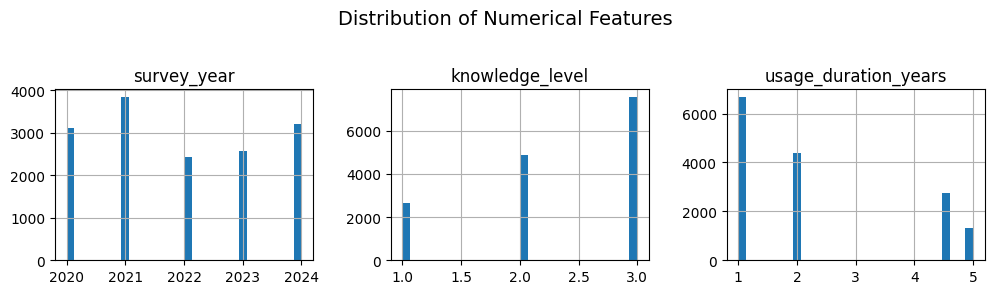

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = df_crypto_new.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df_crypto_new[num_cols].hist(figsize=(12, 8), bins=30, layout=(3, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

categorical columns:

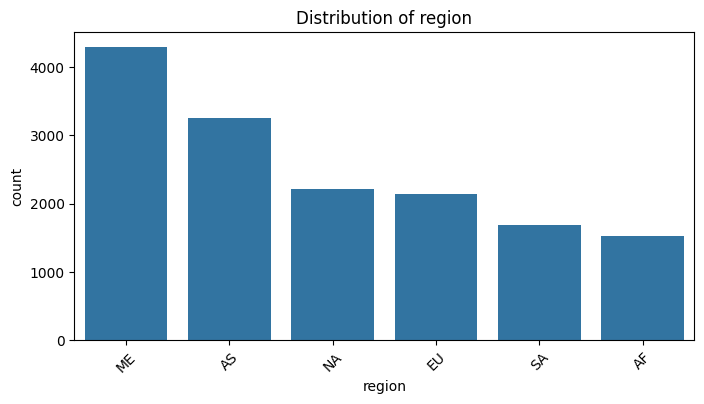

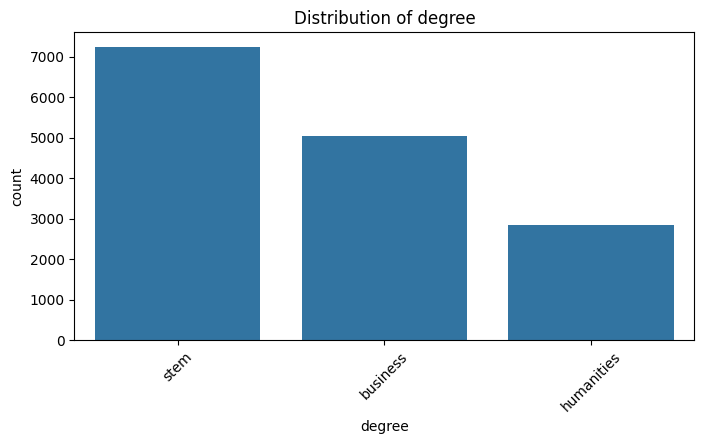

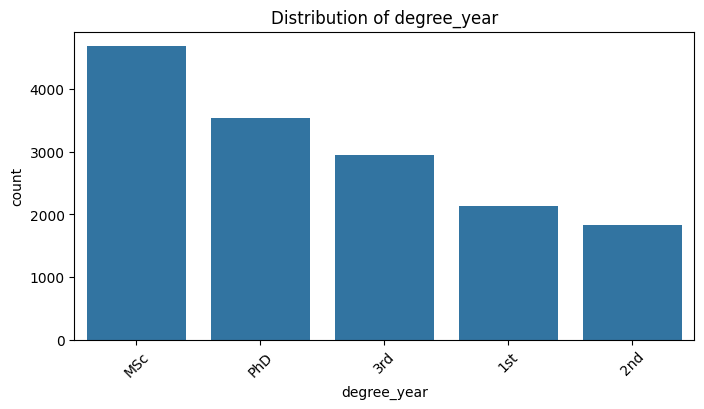

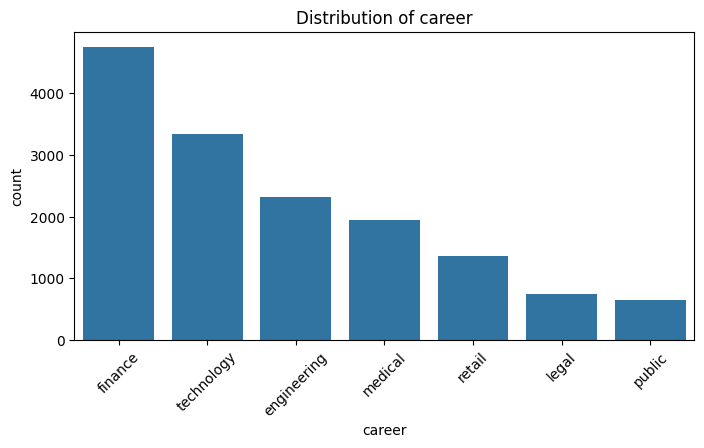

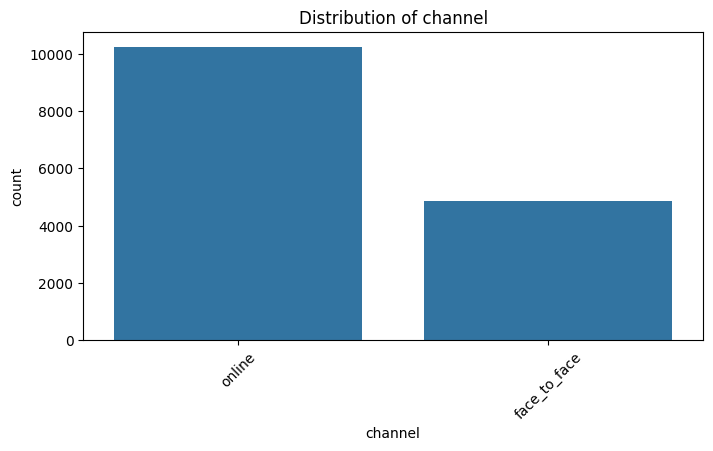

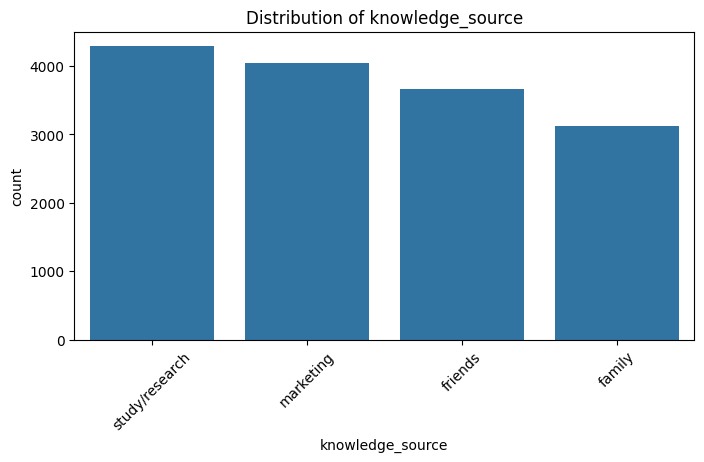

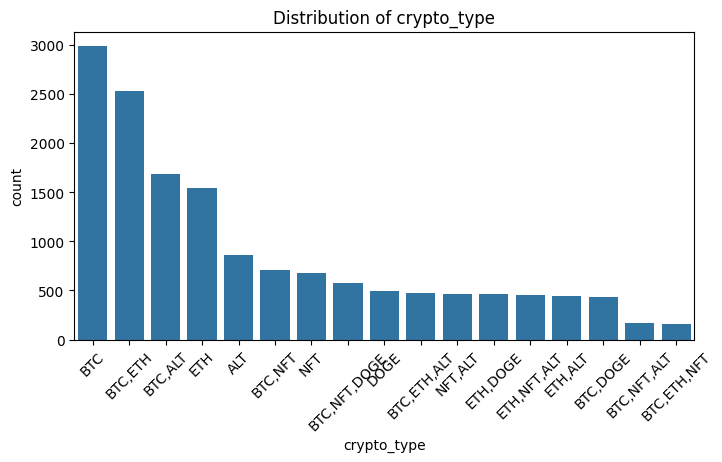

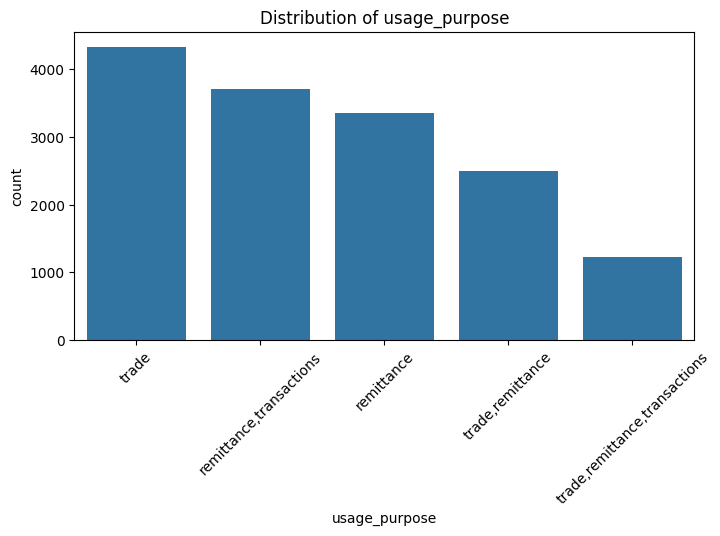

In [ ]:
cat_cols = df_crypto_new.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_crypto_new, x=col, order=df_crypto_new[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

###**Dimensionality Reduction**

#####**correlation matrix and heatmap**

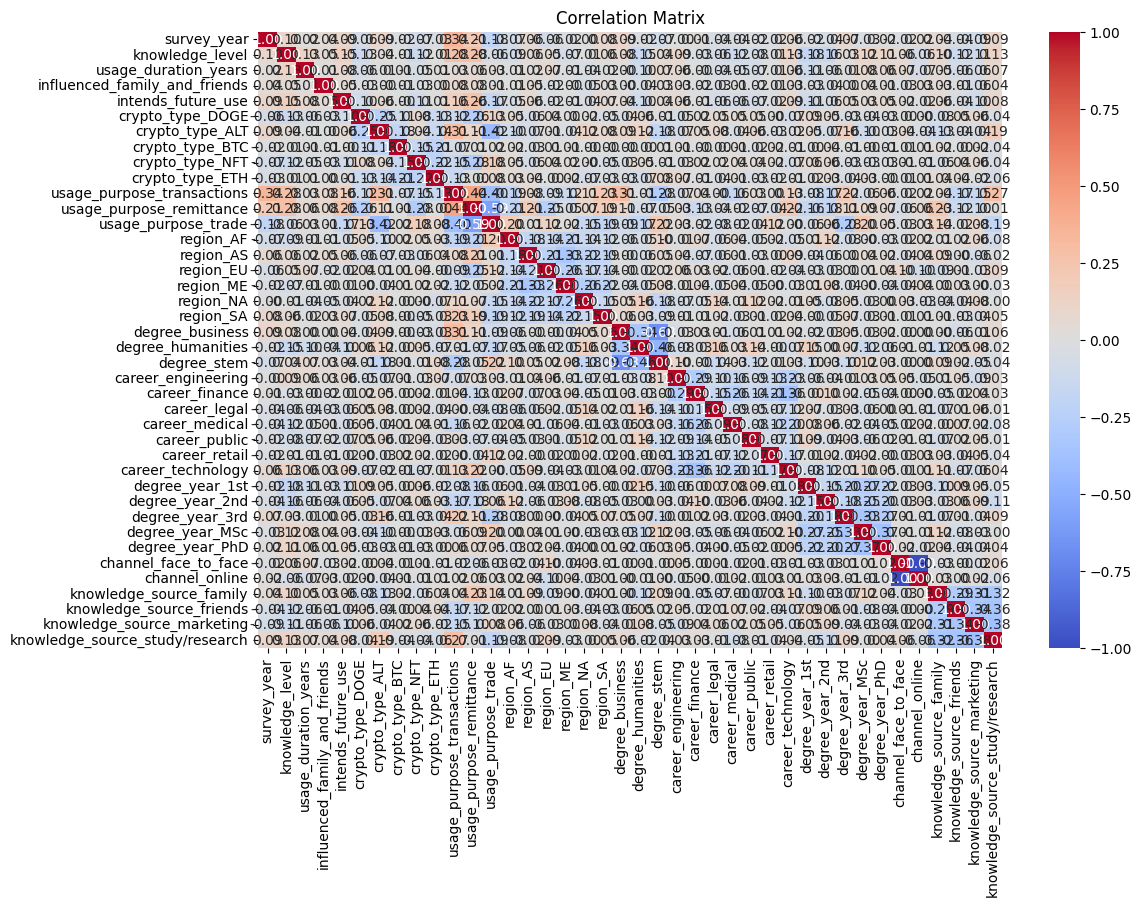

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_crypto_dummified.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
# Identify highly correlated features
threshold = 0.44
# Get the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features to drop due to high correlation: {to_drop}")

# Remove the correlated features from the data
df_crypto_dummified_selected = df_crypto_dummified.drop(columns=to_drop)

Features to drop due to high correlation: ['usage_purpose_remittance']


highest correlation between features is around 0.44 with usage_purpose_remittance, so remove none?

#####**PCA**

In [ ]:
df = df_crypto_dummified.copy()

# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5' ,'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# (Optional) Attach labels or IDs if needed
# df_pca['survey_year'] = df_crypto_dummified['survey_year']

# Step 5: Explained variance (optional)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Result
print(df_pca.head())


Explained Variance Ratio: [0.08657826 0.06564492 0.05353274 0.04144138 0.04097691 0.03724622
 0.03549287 0.03347768 0.03236334 0.03145851]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.344346  0.753265  1.731320 -0.224810  0.247754 -2.539577  1.245324   
1 -1.014017  1.343098 -3.711664  0.284923  0.832833  1.814648 -0.901401   
2  2.801102 -0.685088  0.724190 -0.893995  0.276106  1.465426  0.006734   
3 -2.884284 -0.032766  0.008073  1.116959  2.297003  0.863276  0.908829   
4  0.652211  2.048545  0.690257  0.448477 -2.210824  0.763409 -2.072958   

        PC8       PC9      PC10  
0 -0.287046  1.961190 -0.121053  
1 -0.766399  0.028304  2.598255  
2  1.526979  0.092788 -1.004485  
3 -0.194376 -1.207925 -0.408040  
4 -0.422296  0.114536 -1.163253  


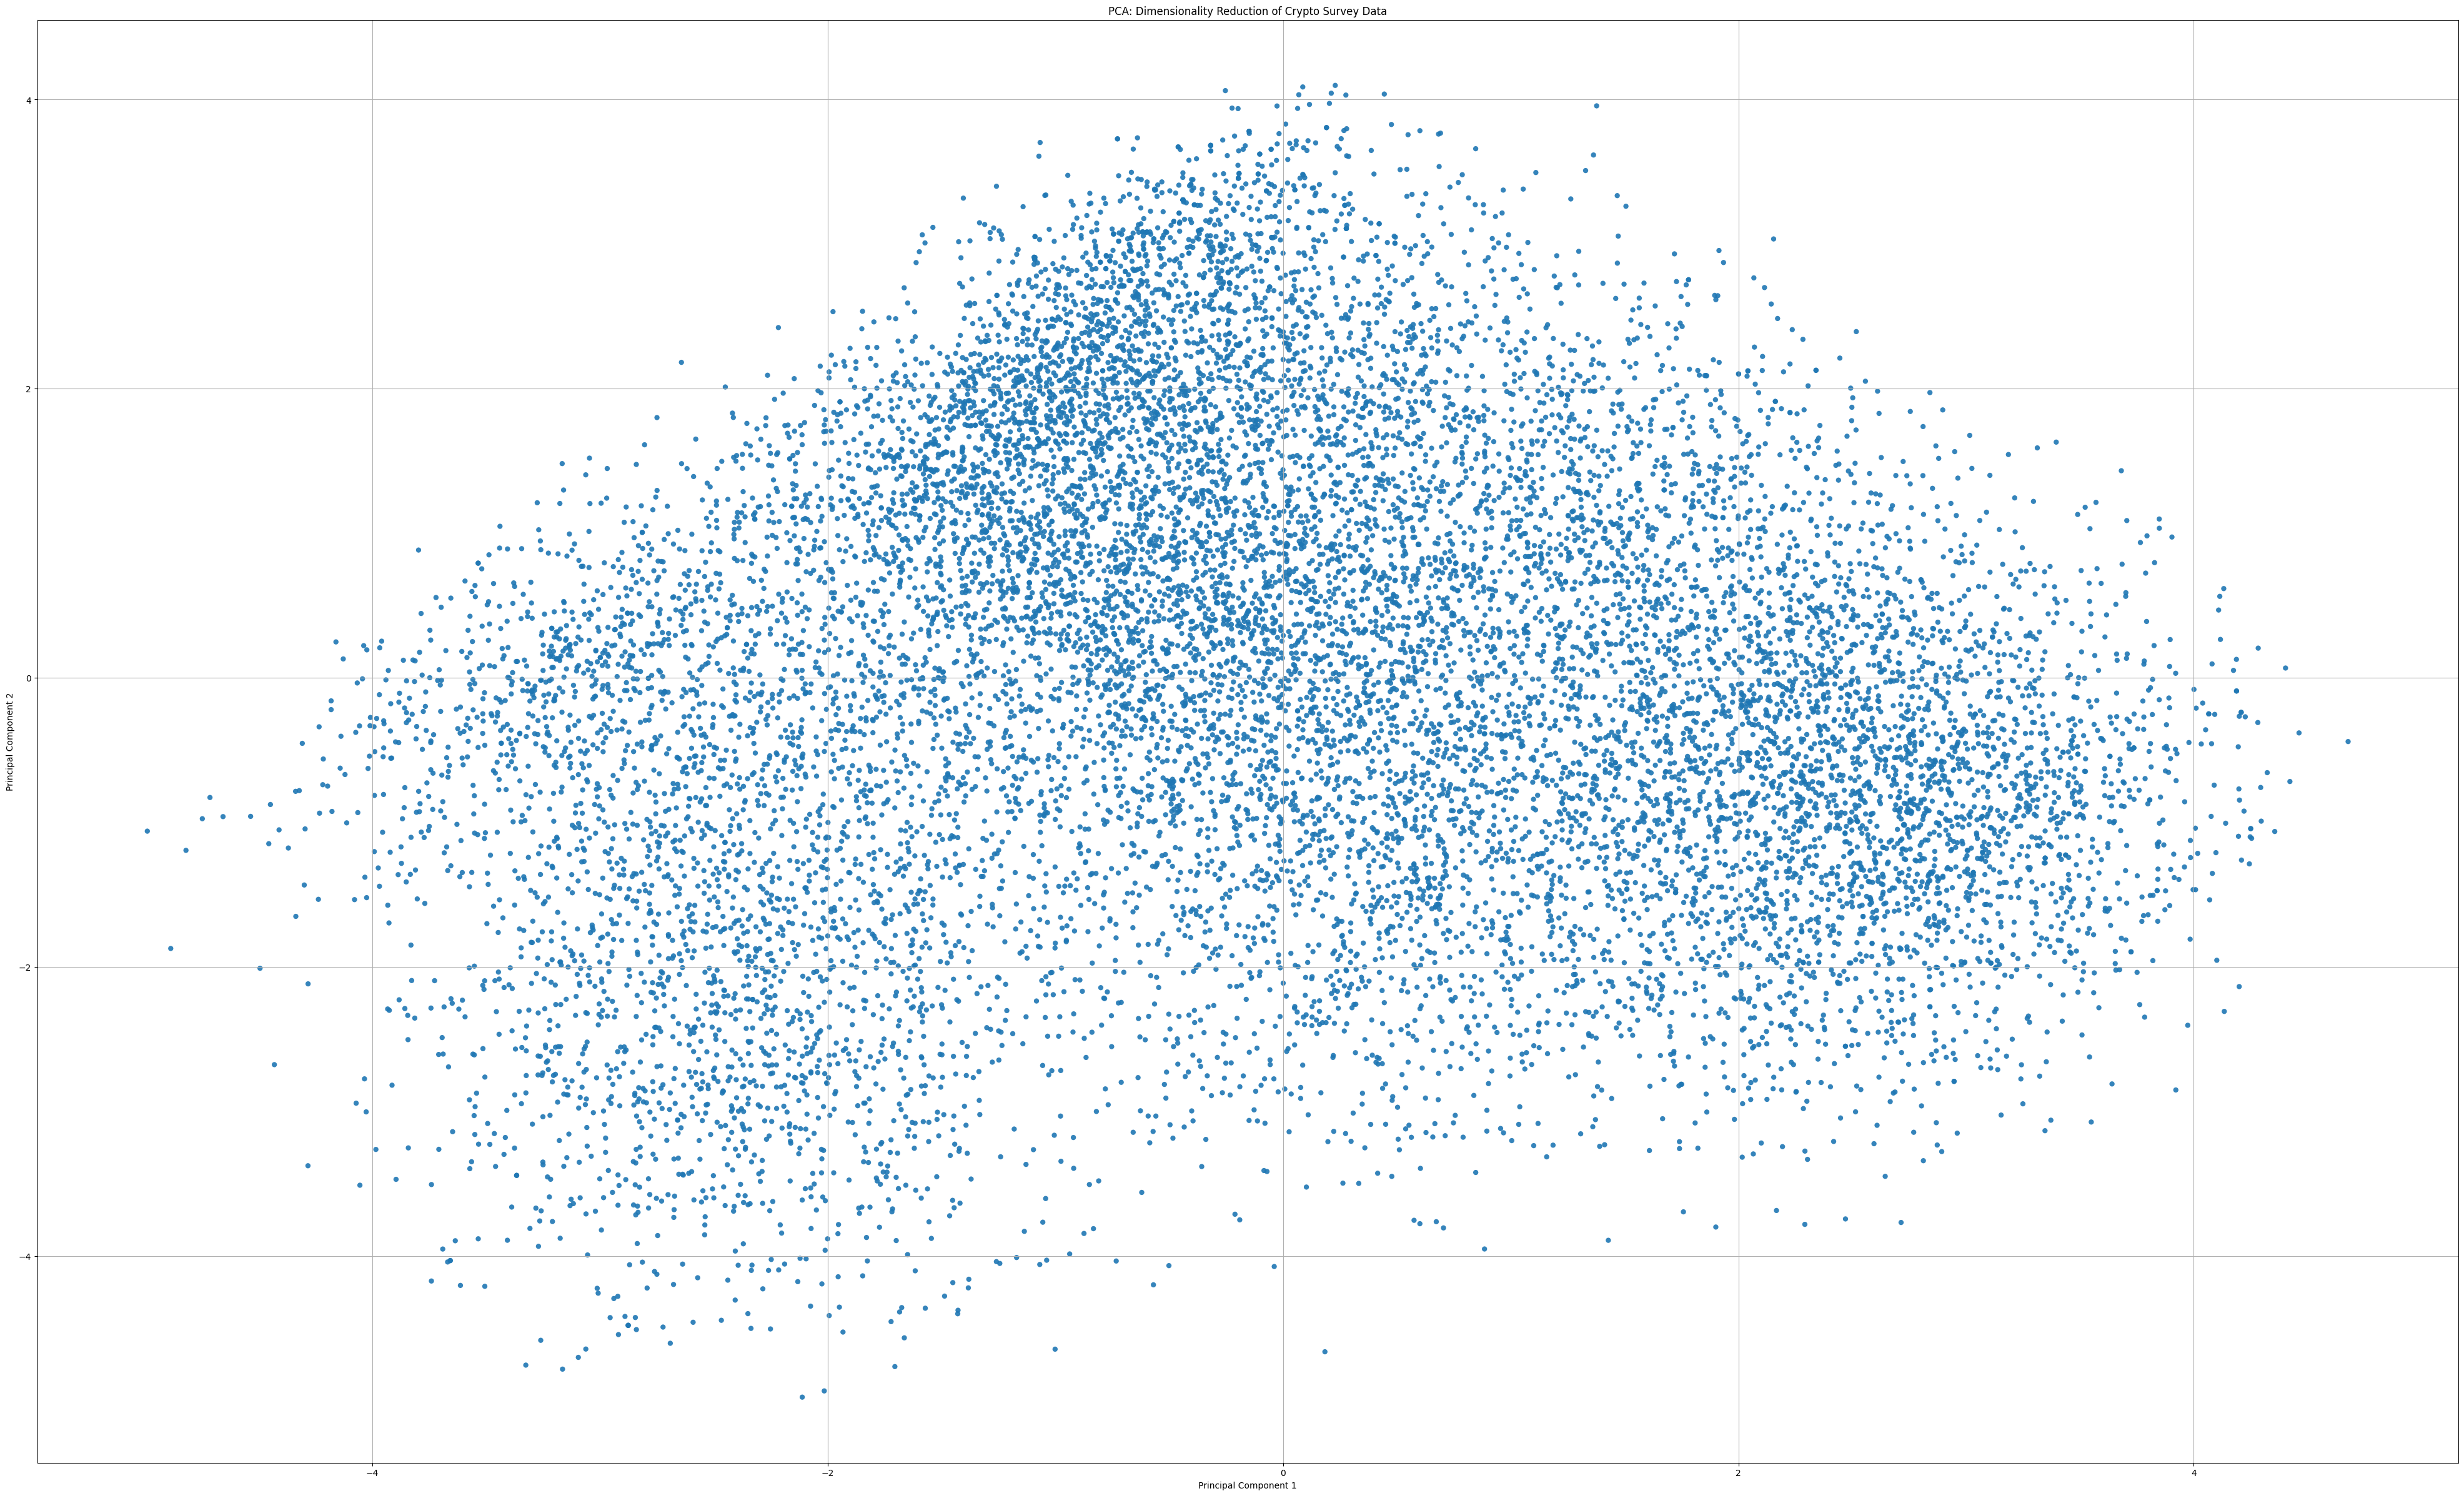

In [ ]:
# Basic scatter plot of the PCA result
plt.figure(figsize=(50,30))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.9, edgecolors='none')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Dimensionality Reduction of Crypto Survey Data')
plt.grid(True)

plt.show()


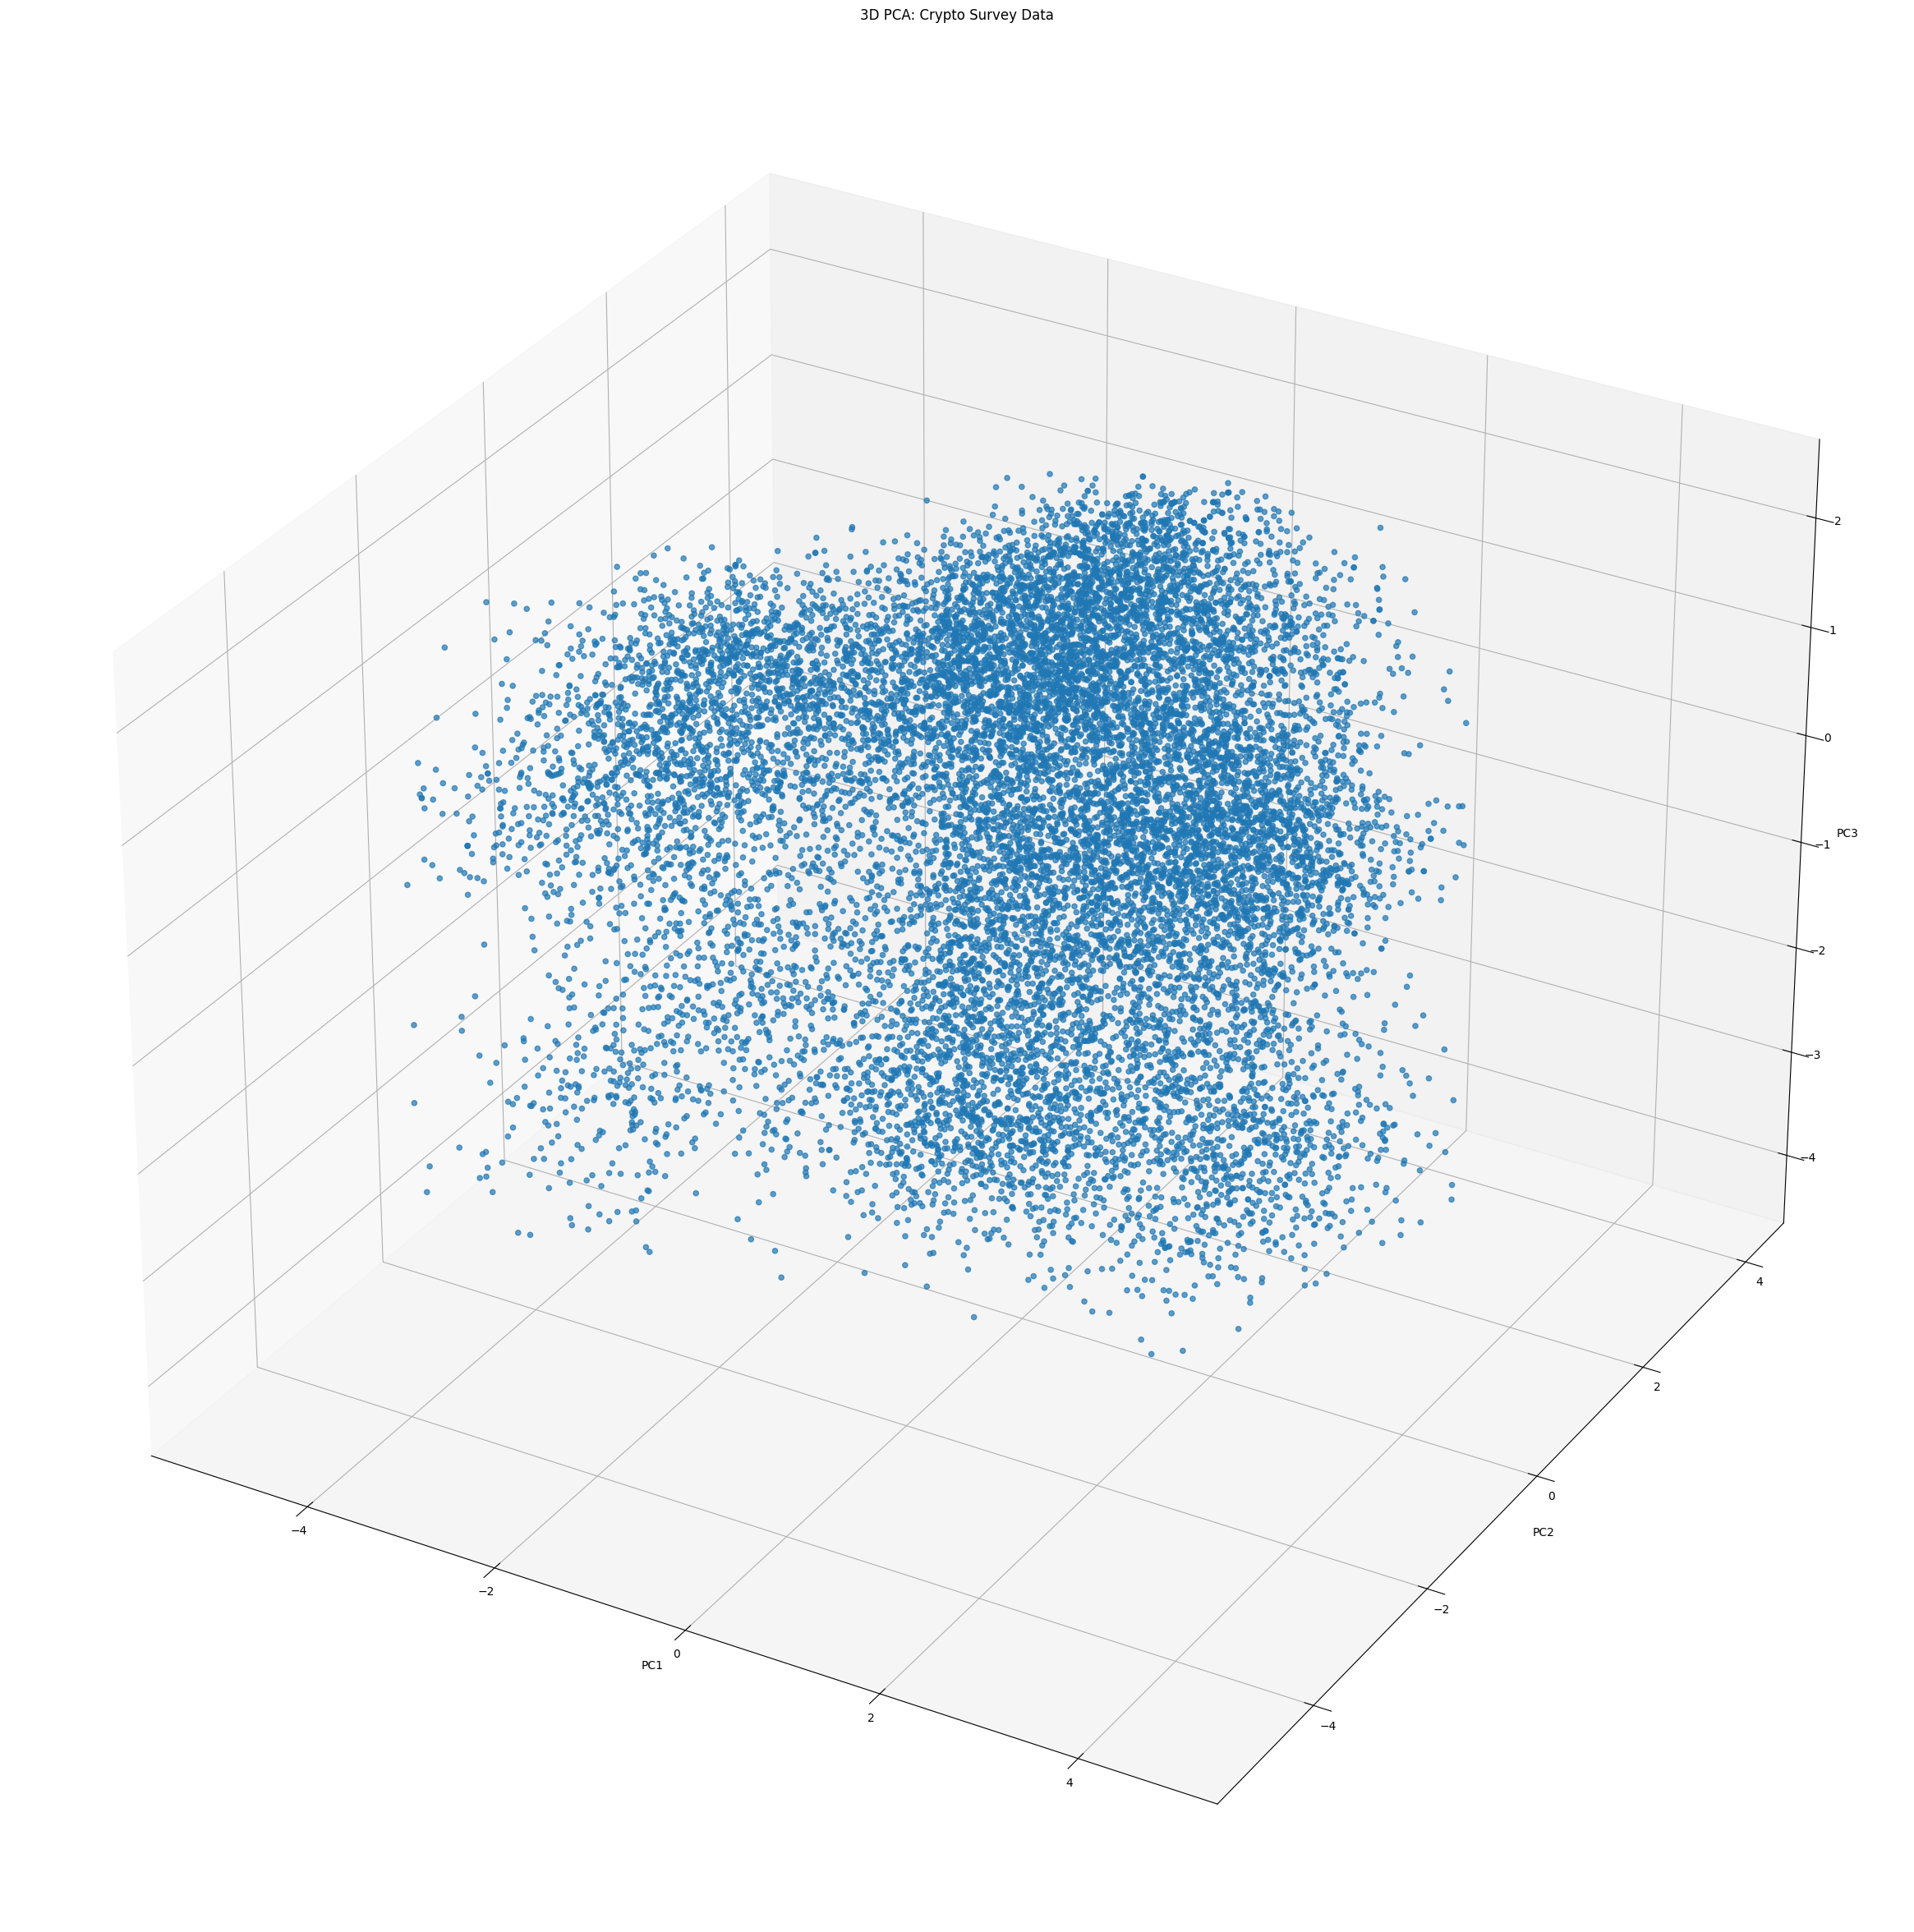

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA for 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA: Crypto Survey Data')

plt.show()


if 2 features are highly correlated - doesn’t add much to the variance, check correlation to other features

####**Finalized Data Set** - Clean

In [ ]:
# Version to visually look at and understand dataset
df_crypto

survey_year region      degree degree_year       career       channel  \
0             2022     ME    business         2nd      medical        online   
1             2020     EU        stem         MSc  engineering  face_to_face   
2             2024     AS  humanities         PhD      medical        online   
3             2021     EU        stem         2nd      finance        online   
4             2021     NA        stem         MSc   technology        online   
...            ...    ...         ...         ...          ...           ...   
15805         2020     ME  humanities         PhD       retail  face_to_face   
15806         2024     AF    business         1st      finance        online   
15807         2020     ME    business         MSc      medical        online   
15808         2021     AS        stem         MSc  engineering        online   
15809         2024     NA    business         MSc       retail  face_to_face   

       knowledge_level knowledge_source  crypto_type  \
0                  3.0           family          BTC   
1                  3.0   study/research  BTC,ETH,ALT   
2                  3.0   study/research      BTC,ALT   
3                  3.0          friends         DOGE   
4                  3.0           family          NFT   
...                ...              ...          ...   
15805              2.0   study/research          ALT   
15806              1.0          friends      ETH,ALT   
15807              1.0   study/research      BTC,NFT   
15808              2.0   study/research          ETH   
15809              3.0           family      BTC,ETH   

                       usage_purpose  usage_duration_years  \
0                         remittance                   4.5   
1                              trade                   1.0   
2            remittance,transactions                   4.5   
3                              trade                   1.0   
4      trade,remittance,transactions                   4.5   
...                              ...                   ...   
15805        remittance,transactions                   1.0   
15806                          trade                   2.0   
15807                          trade                   1.0   
15808                          trade                   2.0   
15809  trade,remittance,transactions                   1.0   

       influenced_family_and_friends  intends_future_use  career_missing  \
0                               True                True           False   
1                              False                True           False   
2                              False                True           False   
3                               True                True           False   
4                              False                True           False   
...                              ...                 ...             ...   
15805                           True               False           False   
15806                          False                True            True   
15807                           True               False           False   
15808                           True                True           False   
15809                           True                True           False   

       knowledge_level_missing  usage_duration_years_missing  \
0                        False                         False   
1                        False                         False   
2                        False                         False   
3                        False                         False   
4                         True                         False   
...                        ...                           ...   
15805                    False                          True   
15806                    False                         False   
15807                    False                         False   
15808                    False                         False   
15809      

In [ ]:
# Version for modelling
df_crypto_dummified

survey_year  knowledge_level  usage_duration_years  \
0             2022              3.0                   4.5   
1             2020              3.0                   1.0   
2             2024              3.0                   4.5   
3             2021              3.0                   1.0   
4             2021              3.0                   4.5   
...            ...              ...                   ...   
15805         2020              2.0                   1.0   
15806         2024              1.0                   2.0   
15807         2020              1.0                   1.0   
15808         2021              2.0                   2.0   
15809         2024              3.0                   1.0   

       influenced_family_and_friends  intends_future_use  crypto_type_DOGE  \
0                                  1                   1                 0   
1                                  0                   1                 0   
2                                  0                   1                 0   
3                                  1                   1                 1   
4                                  0                   1                 0   
...                              ...                 ...               ...   
15805                              1                   0                 0   
15806                              0                   1                 0   
15807                              1                   0                 0   
15808                              1                   1                 0   
15809                              1                   1                 0   

       crypto_type_ALT  crypto_type_BTC  crypto_type_NFT  crypto_type_ETH  \
0                    0                1                0                0   
1                    1                1                0                1   
2                    1                1                0                0   
3                    0                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
15805                1                0                0                0   
15806                1                0                0                1   
15807                0                1                1                0   
15808                0                0                0                1   
15809                0                1                0                1   

       ...  degree_year_2nd  degree_year_3rd  degree_year_MSc  \
0      ...                1                0                0   
1      ...                0                0                1   
2      ...                0                0                0   
3      ...                1                0                0   
4      ...                0                0                1   
...    ...              ...              ...              ...   
15805  ...                0                0                0   
15806  ...                0                0                0   
15807  ...                0                0                1   
15808  ...                0                0                1   
15809  ...                0                0                1   

       degree_year_PhD  channel_face_to_face  channel_online  \
0                    0                     0               1   
1                    0                     1               0   
2                    1                     0               1   
3                    0                     0               1   
4                    0                     0               1   
...                ...                   ...             ...   
15805                1                     1               0   
15806                0                     0               1   
15807                0                     0           

## Dataset B (Student Engagement)

In [ ]:
# Download dataset
df_student = pd.read_csv('/content/UK online student engagement.csv')
df_student

Unnamed: 0 External    Year  session 1  session 2 test 1  session 3  \
0               0        N   third         13         20      F        NaN   
1               1        N   third         71         77      A       40.0   
2               2        Y   first         32         62      F       76.0   
3               3        Y   first          8          4      F       46.0   
4               4        Y   first          6          1      F       23.0   
...           ...      ...     ...        ...        ...    ...        ...   
11244       11244        Y  second          7         30      D        4.0   
11245       11245        Y   third         59         63      A       90.0   
11246       11246        Y   third         25         59      C       82.0   
11247       11247        N   third         12         13      D       40.0   
11248       11248        Y   third         97         28      C       52.0   

       session 4 test 2  session 5 test 3  session 6 ind cw group cw  \
0            NaN    NaN        NaN    NaN        NaN    NaN      NaN   
1           67.0      A       69.0      A       41.0      A        A   
2           77.0      A       35.0      F       93.0      F        F   
3           36.0      C       93.0      B       79.0      A        D   
4           33.0      D       90.0      C       82.0      C        A   
...          ...    ...        ...    ...        ...    ...      ...   
11244       35.0      F       28.0      B       91.0      D        D   
11245       40.0      A       57.0      F       93.0      D        C   
11246       33.0      F       77.0      B       56.0      B        F   
11247       43.0      D       57.0      B       23.0      D        C   
11248       22.0      C       93.0      A       65.0      F        C   

      final grade  fourm Q  fourm A  office hour visits droupout  
0             NaN        1        0                   1        Y  
1               D       13        4                   4        N  
2               B       16        9                   3        N  
3               B       22        4                   6        N  
4               C       19        9                   7        N  
...           ...      ...      ...                 ...      ...  
11244           F       19        7                   4        N  
11245           A       13        6                   5        N  
11246           A       12        9                   5        N  
11247           D       12        6                   6        N  
11248           A        8        2                   6        N  

[11249 rows x 19 columns]

### Standardizing Data Format

#### Standardize column names

In [ ]:
'''Standardizing Column Names'''
# Removing Unnamed: 0 column
df_student = df_student.drop(columns=['Unnamed: 0'])
# Lowercase and remove whitespace from column names
df_student.columns = [col.lower().replace(' ', '_') for col in df_student.columns]
df_student = df_student.rename(columns={'fourm_q':'forum_q', 'fourm_a':'forum_a', 'droupout':'dropout'})

#### Standardize Column Datatypes

In [ ]:
non_cont_cols = [name for name in df_student.columns if ('session' not in name)]
for col in non_cont_cols:
    df_student[col] = df_student[col].astype(object)
df_student.dtypes

external               object
year                   object
session_1               int64
session_2               int64
test_1                 object
session_3             float64
session_4             float64
test_2                 object
session_5             float64
test_3                 object
session_6             float64
ind_cw                 object
group_cw               object
final_grade            object
forum_q                object
forum_a                object
office_hour_visits     object
dropout                object
dtype: object

#### Check for mismatches

In [ ]:
'''Check for mismatched data values'''
for col in df_student.columns:
    if df_student[col].dtype == 'object':
        col_values = df_student[col].unique()
        print(col_values)
  # No values are 'mismatched' (first/second/third, Y/N, and A/B/C/D/F are all present/consistent/no whitespace
  # NaN values will be handled in different phase)

['N' 'Y']
['third' 'first' 'second']
['F' 'A' 'C' 'D' 'B']
[nan 'A' 'C' 'D' 'F' 'B']
[nan 'A' 'F' 'B' 'C' 'D']
[nan 'A' 'F' 'C' 'B' 'D']
[nan 'A' 'F' 'D' 'B' 'C']
[nan 'D' 'B' 'C' 'A' 'F']
[1 13 16 22 19 6 12 4 11 0 8 15 7 18 23 14 3 2 9 10 17 29 24 5 25 20 28 26
 21 27]
[0 4 9 3 8 6 2 1 12 7 22 11 5 17 24 14 15 20 19 10 18 16 13 21 23]
[1 4 3 6 7 0 2 5 8 9]
['Y' 'N']


#### Moving values to more standardized datatypes

In [ ]:
# Converting Y/N to True/False, first/second/third to 1/2/3, A/B/C/D/F to 5/4/3/2/1
df_student = df_student.replace({'Y': True, 'N': False, 'first': 1, 'second': 2, 'third': 3, 'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1})

#### Check for poorly formatted numbers

In [ ]:
unformatted_number_count = 0
for val in col_values:
    try:
        test_val = float(val)
        # Checking for decimals
        if val != round(val):
            print(f'Decimal Number: {val}')
            unformatted_number_count += 1
        # Checking for impossible percentages
        if val > 100 or val < 0:
            print(f'Incorrect Number: {val}')
            unformatted_number_count += 1
    except ValueError: #for NaN numbers
        pass
print(f'Unformatted Numbers: {unformatted_number_count}')
# No decimal numbers, no apparent issues with mismatches

Unformatted Numbers: 0


#### Check for duplicates

In [ ]:
'''Checking for duplicates'''
duplicates = df_student[df_student.duplicated(keep=False)]
print(duplicates)
# Most likely different students, it would be more suspicious of duplicates were they not all early dropouts or if they were sequential

       external  year  session_1  session_2  test_1  session_3  session_4  \
1127       True     2         14          2       1        NaN        NaN   
1440       True     2         14          2       1        NaN        NaN   
3116       True     1         17         19       1        NaN        NaN   
5592       True     1         17         19       1        NaN        NaN   
7713       True     1         12         14       1        NaN        NaN   
10256      True     1         12         14       1        NaN        NaN   

       test_2  session_5  test_3  session_6  ind_cw  group_cw  final_grade  \
1127      NaN        NaN     NaN        NaN     NaN       NaN          NaN   
1440      NaN        NaN     NaN        NaN     NaN       NaN          NaN   
3116      NaN        NaN     NaN        NaN     NaN       NaN          NaN   
5592      NaN        NaN     NaN        NaN     NaN       NaN          NaN   
7713      NaN        NaN     NaN        NaN     NaN       NaN         

### Removing students with financial dropouts after final

In [ ]:
df_student = df_student[~((df_student['dropout'] == 1) & (df_student['final_grade'] > 2))]
df_student

external  year  session_1  session_2  test_1  session_3  session_4  \
0         False     3         13         20       1        NaN        NaN   
1         False     3         71         77       5       40.0       67.0   
2          True     1         32         62       1       76.0       77.0   
3          True     1          8          4       1       46.0       36.0   
4          True     1          6          1       1       23.0       33.0   
...         ...   ...        ...        ...     ...        ...        ...   
11244      True     2          7         30       2        4.0       35.0   
11245      True     3         59         63       5       90.0       40.0   
11246      True     3         25         59       3       82.0       33.0   
11247     False     3         12         13       2       40.0       43.0   
11248      True     3         97         28       3       52.0       22.0   

       test_2  session_5  test_3  session_6  ind_cw  group_cw  final_grade  \
0         NaN        NaN     NaN        NaN     NaN       NaN          NaN   
1         5.0       69.0     5.0       41.0     5.0       5.0          2.0   
2         5.0       35.0     1.0       93.0     1.0       1.0          4.0   
3         3.0       93.0     4.0       79.0     5.0       2.0          4.0   
4         2.0       90.0     3.0       82.0     3.0       5.0          3.0   
...       ...        ...     ...        ...     ...       ...          ...   
11244     1.0       28.0     4.0       91.0     2.0       2.0          1.0   
11245     5.0       57.0     1.0       93.0     2.0       3.0          5.0   
11246     1.0       77.0     4.0       56.0     4.0       1.0          5.0   
11247     2.0       57.0     4.0       23.0     2.0       3.0          2.0   
11248     3.0       93.0     5.0       65.0     1.0       3.0          5.0   

       forum_q  forum_a  office_hour_visits  dropout  
0            1        0                   1     True  
1           13        4                   4    False  
2           16        9                   3    False  
3           22        4                   6    False  
4           19        9                   7    False  
...        ...      ...                 ...      ...  
11244       19        7                   4    False  
11245       13        6                   5    False  
11246       12        9                   5    False  
11247       12        6                   6    False  
11248        8        2                   6    False  

[11109 rows x 18 columns]

### Fixing Missing Values

In [ ]:
# check all missing values handled:
nan_percent = df_student.isna().sum()/df_student.shape[0]
print(f'Total rows: {df_student.shape[0]}')
# Numbers approach 30% with columns such as final_grade and group_cw
nan_percent

Total rows: 11109


external              0.000000
year                  0.000000
session_1             0.000000
session_2             0.000000
test_1                0.000000
session_3             0.084616
session_4             0.084616
test_2                0.084616
session_5             0.196777
test_3                0.196777
session_6             0.284544
ind_cw                0.284544
group_cw              0.284544
final_grade           0.284544
forum_q               0.000000
forum_a               0.000000
office_hour_visits    0.000000
dropout               0.000000
dtype: float64

In [ ]:
df_missed_last = df_student[~pd.isna(df_student['group_cw'])]
df_missed_last['dropout'].value_counts()

dropout
False    7305
True      643
Name: count, dtype: int64

In [ ]:
df_missed_last = df_student[~pd.isna(df_student['ind_cw'])]
df_missed_last['dropout'].value_counts()

dropout
False    7305
True      643
Name: count, dtype: int64

In [ ]:
df_missed_last = df_student[~pd.isna(df_student['final_grade'])]
df_missed_last['dropout'].value_counts()

dropout
False    7305
True      643
Name: count, dtype: int64

#### Removing columns from individual/group assignments and final

In [ ]:
# Much of the data isn't filled and will be more reflective of students who completed the course instead of the full dataset
df_student = df_student.drop(columns=['ind_cw', 'group_cw','final_grade'])
df_student

external  year  session_1  session_2  test_1  session_3  session_4  \
0         False     3         13         20       1        NaN        NaN   
1         False     3         71         77       5       40.0       67.0   
2          True     1         32         62       1       76.0       77.0   
3          True     1          8          4       1       46.0       36.0   
4          True     1          6          1       1       23.0       33.0   
...         ...   ...        ...        ...     ...        ...        ...   
11244      True     2          7         30       2        4.0       35.0   
11245      True     3         59         63       5       90.0       40.0   
11246      True     3         25         59       3       82.0       33.0   
11247     False     3         12         13       2       40.0       43.0   
11248      True     3         97         28       3       52.0       22.0   

       test_2  session_5  test_3  session_6  forum_q  forum_a  \
0         NaN        NaN     NaN        NaN        1        0   
1         5.0       69.0     5.0       41.0       13        4   
2         5.0       35.0     1.0       93.0       16        9   
3         3.0       93.0     4.0       79.0       22        4   
4         2.0       90.0     3.0       82.0       19        9   
...       ...        ...     ...        ...      ...      ...   
11244     1.0       28.0     4.0       91.0       19        7   
11245     5.0       57.0     1.0       93.0       13        6   
11246     1.0       77.0     4.0       56.0       12        9   
11247     2.0       57.0     4.0       23.0       12        6   
11248     3.0       93.0     5.0       65.0        8        2   

       office_hour_visits  dropout  
0                       1     True  
1                       4    False  
2                       3    False  
3                       6    False  
4                       7    False  
...                   ...      ...  
11244                   4    False  
11245                   5    False  
11246                   5    False  
11247                   6    False  
11248                   6    False  

[11109 rows x 15 columns]

In [ ]:
# check all missing values handled:
nan_values = df_student.isna().sum()
nan_values

external                 0
year                     0
session_1                0
session_2                0
test_1                   0
session_3              940
session_4              940
test_2                 940
session_5             2186
test_3                2186
session_6             3161
forum_q                  0
forum_a                  0
office_hour_visits       0
dropout                  0
dtype: int64

#### Filling in NaN values of sessions with average from other sessions

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
session_cols = [name for name in df_student.columns if ('session' in name)]
for idx in df_student.index:
    if pd.isna(df_student.loc[idx, 'session_6']):
        row_numeric = df_student.loc[idx, session_cols]
        row_mean = row_numeric.mean(skipna=True, numeric_only=False, )
        df_student.loc[idx, session_cols] = row_numeric.fillna(row_mean)

In [ ]:
# check all missing values handled:
nan_values = df_student.isna().sum()
nan_values

external                 0
year                     0
session_1                0
session_2                0
test_1                   0
session_3                0
session_4                0
test_2                 940
session_5                0
test_3                2186
session_6                0
forum_q                  0
forum_a                  0
office_hour_visits       0
dropout                  0
dtype: int64

#### Filling in NaN values of tests with average test score by student

In [ ]:
test_cols = [name for name in df_student.columns if ('test' in name)]
for col in test_cols:
    # Calculate the most frequent value (mode) in test columns
    mode_value = df_student[col].mode()[0]
    # Impute missing values with the mode
    df_student[col] = df_student[col].fillna(mode_value)
# check all missing values handled:
nan_values = df_student.isna().sum()
nan_values

external              0
year                  0
session_1             0
test_1                0
session_4             0
test_2                0
session_5             0
test_3                0
session_6             0
office_hour_visits    0
dropout               0
dtype: int64

In [ ]:
session_cols = [col for col in df_student.columns if 'session' in col]
non_cont_cols = [name for name in df_student.columns if ('session' not in name)]
for col in non_cont_cols:
    df_student[col] = df_student[col].astype(object)
for col in session_cols:
    df_student[col] = df_student[col].astype('int64')
df_student['forum_q'] = df_student['forum_q'].astype('int64')
df_student['forum_a'] = df_student['forum_a'].astype('int64')
df_student.dtypes

external              object
year                  object
session_1              int64
session_2              int64
test_1                object
session_3              int64
session_4              int64
test_2                object
session_5              int64
test_3                object
session_6              int64
forum_q                int64
forum_a                int64
office_hour_visits    object
dropout               object
dtype: object

#### Removing high correlation columns

In [ ]:
'''Column Reduction'''
cor_target = abs(df_student.corr(numeric_only=True))
print(cor_target[cor_target>0.4])
high_corr_cols = ['forum_q','forum_a','session_2','session_3']
df_student = df_student.drop(columns=high_corr_cols)
cor_target = abs(df_student.corr(numeric_only=True))

           session_1  session_2  session_3  session_4  session_5  session_6  \
session_1   1.000000   0.542568   0.491173        NaN        NaN        NaN   
session_2   0.542568   1.000000   0.494249        NaN        NaN        NaN   
session_3   0.491173   0.494249   1.000000        NaN        NaN   0.470708   
session_4        NaN        NaN        NaN        1.0        NaN        NaN   
session_5        NaN        NaN        NaN        NaN        1.0        NaN   
session_6        NaN        NaN   0.470708        NaN        NaN   1.000000   
forum_q          NaN        NaN        NaN        NaN        NaN        NaN   
forum_a          NaN        NaN        NaN        NaN        NaN        NaN   

            forum_q   forum_a  
session_1       NaN       NaN  
session_2       NaN       NaN  
session_3       NaN       NaN  
session_4       NaN       NaN  
session_5       NaN       NaN  
session_6       NaN       NaN  
forum_q    1.000000  0.482162  
forum_a    0.482162  1.000000  


#### Creating All-Numeric Version of Dataset

In [ ]:
dummy_student = df_student.replace({True:1, False:0})
dummy_student

external  year  session_1  test_1  session_4  test_2  session_5  \
0             0     3         13       1         16     2.0         16   
1             0     3         71       5         67     5.0         69   
2             1     1         32       1         77     5.0         35   
3             1     1          8       1         36     3.0         93   
4             1     1          6       1         33     2.0         90   
...         ...   ...        ...     ...        ...     ...        ...   
11244         1     2          7       2         35     1.0         28   
11245         1     3         59       5         40     5.0         57   
11246         1     3         25       3         33     1.0         77   
11247         0     3         12       2         43     2.0         57   
11248         1     3         97       3         22     3.0         93   

       test_3  session_6  office_hour_visits  dropout  
0         1.0         16                   1        1  
1         5.0         41                   4        0  
2         1.0         93                   3        0  
3         4.0         79                   6        0  
4         3.0         82                   7        0  
...       ...        ...                 ...      ...  
11244     4.0         91                   4        0  
11245     1.0         93                   5        0  
11246     4.0         56                   5        0  
11247     4.0         23                   6        0  
11248     5.0         65                   6        0  

[11109 rows x 11 columns]

### PCA

In [ ]:
dfs = dummy_student.copy()

# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfs)

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with principal components
dfs_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5' ,'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Step 5: Explained variance (optional)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Result
print(dfs_pca.head())

Explained Variance Ratio: [0.24010587 0.14542613 0.12692261 0.08800085 0.0767662  0.06865226
 0.06676316 0.06296598 0.05438173 0.04474067]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.416648 -1.670778  0.547905  1.175023  0.337792  0.811942  0.274216   
1 -2.342144  1.295171  1.754013  0.503542 -0.681598  0.333831  0.848380   
2 -1.097687  0.825161 -1.921102 -1.428795  1.052072  1.287240  0.655843   
3 -2.070422 -1.437845 -1.777589 -1.059975  1.002105 -0.759747  0.156312   
4 -1.863830 -1.764438 -2.286780 -0.762502  0.820483 -1.004875 -0.257932   

        PC8       PC9      PC10  
0 -1.312242 -0.082902 -0.082571  
1  0.176344  0.803627 -0.631096  
2 -0.428021 -1.235071  1.207074  
3  1.076884  0.551171  0.546497  
4  0.906118 -0.014612  0.277442  


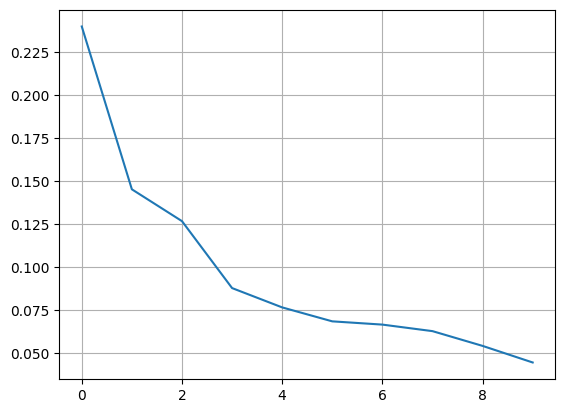

In [ ]:
import matplotlib.pyplot as plt
x_labels = list(enumerate(pca.explained_variance_ratio_, start=1))
# Basic scatter plot of the PCA result
plt.figure()
plt.plot(pca.explained_variance_ratio_)

# Add labels and title
plt.grid(True)

plt.show()

#### PCA for 4 components

In [ ]:
dfs = dummy_student.copy()

# Standardize the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfs)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Explained variance (optional)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(f"Total Variance Ratio: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Explained Variance Ratio: [0.24010587 0.14542613 0.12692261 0.08800085]
Total Variance Ratio: 60.05%


## Finalized Datasets

In [ ]:
# Version for visual observation
df_student

external year  session_1  test_1  session_4  test_2  session_5  test_3  \
0        False    3         13       1         16     2.0         16     1.0   
1        False    3         71       5         67     5.0         69     5.0   
2         True    1         32       1         77     5.0         35     1.0   
3         True    1          8       1         36     3.0         93     4.0   
4         True    1          6       1         33     2.0         90     3.0   
...        ...  ...        ...     ...        ...     ...        ...     ...   
11244     True    2          7       2         35     1.0         28     4.0   
11245     True    3         59       5         40     5.0         57     1.0   
11246     True    3         25       3         33     1.0         77     4.0   
11247    False    3         12       2         43     2.0         57     4.0   
11248     True    3         97       3         22     3.0         93     5.0   

       session_6 office_hour_visits dropout  
0             16                  1    True  
1             41                  4   False  
2             93                  3   False  
3             79                  6   False  
4             82                  7   False  
...          ...                ...     ...  
11244         91                  4   False  
11245         93                  5   False  
11246         56                  5   False  
11247         23                  6   False  
11248         65                  6   False  

[11109 rows x 11 columns]

In [ ]:
# Version for modeling
dummy_student

external  year  session_1  test_1  session_4  test_2  session_5  \
0             0     3         13       1         16     2.0         16   
1             0     3         71       5         67     5.0         69   
2             1     1         32       1         77     5.0         35   
3             1     1          8       1         36     3.0         93   
4             1     1          6       1         33     2.0         90   
...         ...   ...        ...     ...        ...     ...        ...   
11244         1     2          7       2         35     1.0         28   
11245         1     3         59       5         40     5.0         57   
11246         1     3         25       3         33     1.0         77   
11247         0     3         12       2         43     2.0         57   
11248         1     3         97       3         22     3.0         93   

       test_3  session_6  office_hour_visits  dropout  
0         1.0         16                   1        1  
1         5.0         41                   4        0  
2         1.0         93                   3        0  
3         4.0         79                   6        0  
4         3.0         82                   7        0  
...       ...        ...                 ...      ...  
11244     4.0         91                   4        0  
11245     1.0         93                   5        0  
11246     4.0         56                   5        0  
11247     4.0         23                   6        0  
11248     5.0         65                   6        0  

[11109 rows x 11 columns]